In [90]:
from keras.models import Model,Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.callbacks import EarlyStopping
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.decomposition import PCA

# Regression
loss function：Adjusted R squared 

In [111]:
def Radj(y_true, y_pred):
    n = 40
    p = 20
    SSR = K.sum(K.square( y_true-y_pred ))
    SST =  K.sum(K.square( y_true - K.mean(y_true)))
    Radj = 1-(SST/SST)*((n-1)/(n-p-1))
    return -1*(1 - SSR/(SST + K.epsilon()) *((n-1)/(n-p-1)))

In [101]:
def getModel():
    model = Sequential()
    model.add(Dense(units=1))
    model.compile(loss =Radj,optimizer='adam',metrics=['mse']) #'mean_squared_error' ,'mse'
    return model

In [102]:
def show_train_history(train_acc,val_acc,y_label,hist):
    plt.plot(hist.history[train_acc])
    plt.plot(hist.history[val_acc])
    plt.title('Train History')
    plt.ylabel(y_label)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [103]:
# create data
def getRg(p,n_info,range_bt,range_up):
    coef = np.random.uniform(range_bt,range_up,p).round(2)
    idx = np.random.choice(len(coef), size=p-n_info, replace=False)
    coef[idx]=0
    intercept = np.random.uniform(range_bt,range_up,1).round(2)
    print('Ground Truth:\n','intercept:',intercept,'\ncoefs:',coef)
    return (intercept,coef)
def getDataRg(n,p,coef,intercept):
    error = np.random.normal(0,1,(n,))
    X = np.random.normal(0,1,(n,p))
    y = (X *coef).sum(axis=1) + intercept + error
    return (X,y)

In [112]:
p=20 # num of parameters
n_info=20 # num of informative parameters (not zero)
tr_n = 40
ts_n = 200

# ground truth
intercept,coef = getRg(p,n_info,-5,5) # coef range uniform(-5,5)
# get training and testing data
tr_x,tr_y = getDataRg(tr_n,p,coef,intercept)
ts_x,ts_y = getDataRg(ts_n,p,coef,intercept)

Ground Truth:
 intercept: [-4.94] 
coefs: [-2.28  0.66 -3.1  -1.61  2.22  2.05  1.81  3.01 -2.44  2.73 -3.13 -0.25
  3.47  3.06  2.82 -0.58  1.53 -2.56  1.85  1.71]


In [113]:
model = getModel()

In [114]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
hist = model.fit(x=tr_x, y=tr_y,validation_split=0.2,epochs=15000, batch_size=1000,verbose=2,shuffle=True, callbacks=[early_stopping])

Train on 32 samples, validate on 8 samples
Epoch 1/15000
 - 0s - loss: 1.5596 - mse: 101.4716 - val_loss: 2.2740 - val_mse: 169.9739
Epoch 2/15000
 - 0s - loss: 1.5578 - mse: 101.3997 - val_loss: 2.2723 - val_mse: 169.8876
Epoch 3/15000
 - 0s - loss: 1.5560 - mse: 101.3278 - val_loss: 2.2707 - val_mse: 169.8014
Epoch 4/15000
 - 0s - loss: 1.5542 - mse: 101.2560 - val_loss: 2.2690 - val_mse: 169.7150
Epoch 5/15000
 - 0s - loss: 1.5524 - mse: 101.1842 - val_loss: 2.2673 - val_mse: 169.6287
Epoch 6/15000
 - 0s - loss: 1.5505 - mse: 101.1124 - val_loss: 2.2657 - val_mse: 169.5423
Epoch 7/15000
 - 0s - loss: 1.5487 - mse: 101.0407 - val_loss: 2.2640 - val_mse: 169.4558
Epoch 8/15000
 - 0s - loss: 1.5469 - mse: 100.9691 - val_loss: 2.2623 - val_mse: 169.3692
Epoch 9/15000
 - 0s - loss: 1.5451 - mse: 100.8975 - val_loss: 2.2607 - val_mse: 169.2825
Epoch 10/15000
 - 0s - loss: 1.5433 - mse: 100.8260 - val_loss: 2.2590 - val_mse: 169.1956
Epoch 11/15000
 - 0s - loss: 1.5415 - mse: 100.7545 - va

Epoch 92/15000
 - 0s - loss: 1.4001 - mse: 95.1493 - val_loss: 2.0984 - val_mse: 160.8577
Epoch 93/15000
 - 0s - loss: 1.3984 - mse: 95.0824 - val_loss: 2.0964 - val_mse: 160.7537
Epoch 94/15000
 - 0s - loss: 1.3968 - mse: 95.0155 - val_loss: 2.0944 - val_mse: 160.6497
Epoch 95/15000
 - 0s - loss: 1.3951 - mse: 94.9486 - val_loss: 2.0924 - val_mse: 160.5459
Epoch 96/15000
 - 0s - loss: 1.3934 - mse: 94.8818 - val_loss: 2.0904 - val_mse: 160.4420
Epoch 97/15000
 - 0s - loss: 1.3917 - mse: 94.8151 - val_loss: 2.0884 - val_mse: 160.3382
Epoch 98/15000
 - 0s - loss: 1.3900 - mse: 94.7484 - val_loss: 2.0864 - val_mse: 160.2344
Epoch 99/15000
 - 0s - loss: 1.3883 - mse: 94.6818 - val_loss: 2.0844 - val_mse: 160.1306
Epoch 100/15000
 - 0s - loss: 1.3867 - mse: 94.6152 - val_loss: 2.0824 - val_mse: 160.0270
Epoch 101/15000
 - 0s - loss: 1.3850 - mse: 94.5487 - val_loss: 2.0804 - val_mse: 159.9233
Epoch 102/15000
 - 0s - loss: 1.3833 - mse: 94.4822 - val_loss: 2.0784 - val_mse: 159.8197
Epoch 1

Epoch 183/15000
 - 0s - loss: 1.2515 - mse: 89.2579 - val_loss: 1.9185 - val_mse: 151.5181
Epoch 184/15000
 - 0s - loss: 1.2499 - mse: 89.1953 - val_loss: 1.9165 - val_mse: 151.4167
Epoch 185/15000
 - 0s - loss: 1.2484 - mse: 89.1327 - val_loss: 1.9146 - val_mse: 151.3154
Epoch 186/15000
 - 0s - loss: 1.2468 - mse: 89.0701 - val_loss: 1.9126 - val_mse: 151.2141
Epoch 187/15000
 - 0s - loss: 1.2452 - mse: 89.0076 - val_loss: 1.9107 - val_mse: 151.1128
Epoch 188/15000
 - 0s - loss: 1.2436 - mse: 88.9452 - val_loss: 1.9087 - val_mse: 151.0116
Epoch 189/15000
 - 0s - loss: 1.2421 - mse: 88.8828 - val_loss: 1.9068 - val_mse: 150.9104
Epoch 190/15000
 - 0s - loss: 1.2405 - mse: 88.8204 - val_loss: 1.9048 - val_mse: 150.8092
Epoch 191/15000
 - 0s - loss: 1.2389 - mse: 88.7581 - val_loss: 1.9029 - val_mse: 150.7080
Epoch 192/15000
 - 0s - loss: 1.2373 - mse: 88.6958 - val_loss: 1.9009 - val_mse: 150.6069
Epoch 193/15000
 - 0s - loss: 1.2358 - mse: 88.6335 - val_loss: 1.8990 - val_mse: 150.5058

Epoch 274/15000
 - 0s - loss: 1.1119 - mse: 83.7245 - val_loss: 1.7430 - val_mse: 142.4096
Epoch 275/15000
 - 0s - loss: 1.1104 - mse: 83.6655 - val_loss: 1.7411 - val_mse: 142.3108
Epoch 276/15000
 - 0s - loss: 1.1090 - mse: 83.6064 - val_loss: 1.7392 - val_mse: 142.2121
Epoch 277/15000
 - 0s - loss: 1.1075 - mse: 83.5475 - val_loss: 1.7373 - val_mse: 142.1134
Epoch 278/15000
 - 0s - loss: 1.1060 - mse: 83.4885 - val_loss: 1.7354 - val_mse: 142.0148
Epoch 279/15000
 - 0s - loss: 1.1045 - mse: 83.4296 - val_loss: 1.7335 - val_mse: 141.9161
Epoch 280/15000
 - 0s - loss: 1.1030 - mse: 83.3708 - val_loss: 1.7316 - val_mse: 141.8175
Epoch 281/15000
 - 0s - loss: 1.1015 - mse: 83.3119 - val_loss: 1.7297 - val_mse: 141.7190
Epoch 282/15000
 - 0s - loss: 1.1000 - mse: 83.2531 - val_loss: 1.7278 - val_mse: 141.6204
Epoch 283/15000
 - 0s - loss: 1.0986 - mse: 83.1944 - val_loss: 1.7259 - val_mse: 141.5219
Epoch 284/15000
 - 0s - loss: 1.0971 - mse: 83.1357 - val_loss: 1.7240 - val_mse: 141.4234

Epoch 365/15000
 - 0s - loss: 0.9800 - mse: 78.4943 - val_loss: 1.5727 - val_mse: 133.5645
Epoch 366/15000
 - 0s - loss: 0.9786 - mse: 78.4384 - val_loss: 1.5708 - val_mse: 133.4690
Epoch 367/15000
 - 0s - loss: 0.9772 - mse: 78.3825 - val_loss: 1.5690 - val_mse: 133.3736
Epoch 368/15000
 - 0s - loss: 0.9758 - mse: 78.3267 - val_loss: 1.5672 - val_mse: 133.2783
Epoch 369/15000
 - 0s - loss: 0.9744 - mse: 78.2708 - val_loss: 1.5653 - val_mse: 133.1830
Epoch 370/15000
 - 0s - loss: 0.9730 - mse: 78.2151 - val_loss: 1.5635 - val_mse: 133.0877
Epoch 371/15000
 - 0s - loss: 0.9716 - mse: 78.1593 - val_loss: 1.5617 - val_mse: 132.9925
Epoch 372/15000
 - 0s - loss: 0.9702 - mse: 78.1036 - val_loss: 1.5598 - val_mse: 132.8973
Epoch 373/15000
 - 0s - loss: 0.9687 - mse: 78.0479 - val_loss: 1.5580 - val_mse: 132.8022
Epoch 374/15000
 - 0s - loss: 0.9673 - mse: 77.9922 - val_loss: 1.5562 - val_mse: 132.7071
Epoch 375/15000
 - 0s - loss: 0.9659 - mse: 77.9366 - val_loss: 1.5543 - val_mse: 132.6120

Epoch 456/15000
 - 0s - loss: 0.8550 - mse: 73.5372 - val_loss: 1.4090 - val_mse: 125.0651
Epoch 457/15000
 - 0s - loss: 0.8536 - mse: 73.4842 - val_loss: 1.4072 - val_mse: 124.9739
Epoch 458/15000
 - 0s - loss: 0.8523 - mse: 73.4312 - val_loss: 1.4054 - val_mse: 124.8828
Epoch 459/15000
 - 0s - loss: 0.8510 - mse: 73.3782 - val_loss: 1.4037 - val_mse: 124.7917
Epoch 460/15000
 - 0s - loss: 0.8496 - mse: 73.3253 - val_loss: 1.4019 - val_mse: 124.7007
Epoch 461/15000
 - 0s - loss: 0.8483 - mse: 73.2724 - val_loss: 1.4002 - val_mse: 124.6097
Epoch 462/15000
 - 0s - loss: 0.8470 - mse: 73.2196 - val_loss: 1.3984 - val_mse: 124.5187
Epoch 463/15000
 - 0s - loss: 0.8456 - mse: 73.1667 - val_loss: 1.3967 - val_mse: 124.4278
Epoch 464/15000
 - 0s - loss: 0.8443 - mse: 73.1139 - val_loss: 1.3949 - val_mse: 124.3370
Epoch 465/15000
 - 0s - loss: 0.8430 - mse: 73.0611 - val_loss: 1.3932 - val_mse: 124.2462
Epoch 466/15000
 - 0s - loss: 0.8416 - mse: 73.0084 - val_loss: 1.3914 - val_mse: 124.1555

Epoch 547/15000
 - 0s - loss: 0.7364 - mse: 68.8378 - val_loss: 1.2532 - val_mse: 116.9776
Epoch 548/15000
 - 0s - loss: 0.7352 - mse: 68.7876 - val_loss: 1.2515 - val_mse: 116.8911
Epoch 549/15000
 - 0s - loss: 0.7339 - mse: 68.7374 - val_loss: 1.2498 - val_mse: 116.8047
Epoch 550/15000
 - 0s - loss: 0.7326 - mse: 68.6872 - val_loss: 1.2482 - val_mse: 116.7183
Epoch 551/15000
 - 0s - loss: 0.7314 - mse: 68.6370 - val_loss: 1.2465 - val_mse: 116.6320
Epoch 552/15000
 - 0s - loss: 0.7301 - mse: 68.5869 - val_loss: 1.2449 - val_mse: 116.5457
Epoch 553/15000
 - 0s - loss: 0.7288 - mse: 68.5368 - val_loss: 1.2432 - val_mse: 116.4595
Epoch 554/15000
 - 0s - loss: 0.7276 - mse: 68.4867 - val_loss: 1.2415 - val_mse: 116.3734
Epoch 555/15000
 - 0s - loss: 0.7263 - mse: 68.4367 - val_loss: 1.2399 - val_mse: 116.2873
Epoch 556/15000
 - 0s - loss: 0.7250 - mse: 68.3867 - val_loss: 1.2382 - val_mse: 116.2012
Epoch 557/15000
 - 0s - loss: 0.7238 - mse: 68.3367 - val_loss: 1.2366 - val_mse: 116.1152

Epoch 638/15000
 - 0s - loss: 0.6241 - mse: 64.3857 - val_loss: 1.1058 - val_mse: 109.3249
Epoch 639/15000
 - 0s - loss: 0.6229 - mse: 64.3381 - val_loss: 1.1042 - val_mse: 109.2432
Epoch 640/15000
 - 0s - loss: 0.6217 - mse: 64.2906 - val_loss: 1.1026 - val_mse: 109.1616
Epoch 641/15000
 - 0s - loss: 0.6205 - mse: 64.2430 - val_loss: 1.1011 - val_mse: 109.0801
Epoch 642/15000
 - 0s - loss: 0.6193 - mse: 64.1955 - val_loss: 1.0995 - val_mse: 108.9985
Epoch 643/15000
 - 0s - loss: 0.6181 - mse: 64.1481 - val_loss: 1.0979 - val_mse: 108.9171
Epoch 644/15000
 - 0s - loss: 0.6169 - mse: 64.1006 - val_loss: 1.0964 - val_mse: 108.8356
Epoch 645/15000
 - 0s - loss: 0.6157 - mse: 64.0532 - val_loss: 1.0948 - val_mse: 108.7543
Epoch 646/15000
 - 0s - loss: 0.6145 - mse: 64.0058 - val_loss: 1.0932 - val_mse: 108.6730
Epoch 647/15000
 - 0s - loss: 0.6133 - mse: 63.9585 - val_loss: 1.0917 - val_mse: 108.5917
Epoch 648/15000
 - 0s - loss: 0.6121 - mse: 63.9111 - val_loss: 1.0901 - val_mse: 108.5105

Epoch 729/15000
 - 0s - loss: 0.5178 - mse: 60.1713 - val_loss: 0.9667 - val_mse: 102.1045
Epoch 730/15000
 - 0s - loss: 0.5167 - mse: 60.1263 - val_loss: 0.9652 - val_mse: 102.0275
Epoch 731/15000
 - 0s - loss: 0.5155 - mse: 60.0813 - val_loss: 0.9637 - val_mse: 101.9506
Epoch 732/15000
 - 0s - loss: 0.5144 - mse: 60.0363 - val_loss: 0.9623 - val_mse: 101.8737
Epoch 733/15000
 - 0s - loss: 0.5133 - mse: 59.9914 - val_loss: 0.9608 - val_mse: 101.7969
Epoch 734/15000
 - 0s - loss: 0.5121 - mse: 59.9464 - val_loss: 0.9593 - val_mse: 101.7201
Epoch 735/15000
 - 0s - loss: 0.5110 - mse: 59.9016 - val_loss: 0.9578 - val_mse: 101.6433
Epoch 736/15000
 - 0s - loss: 0.5099 - mse: 59.8567 - val_loss: 0.9563 - val_mse: 101.5666
Epoch 737/15000
 - 0s - loss: 0.5087 - mse: 59.8119 - val_loss: 0.9549 - val_mse: 101.4900
Epoch 738/15000
 - 0s - loss: 0.5076 - mse: 59.7671 - val_loss: 0.9534 - val_mse: 101.4134
Epoch 739/15000
 - 0s - loss: 0.5065 - mse: 59.7223 - val_loss: 0.9519 - val_mse: 101.3369

Epoch 820/15000
 - 0s - loss: 0.4173 - mse: 56.1852 - val_loss: 0.8357 - val_mse: 95.3032
Epoch 821/15000
 - 0s - loss: 0.4162 - mse: 56.1427 - val_loss: 0.8343 - val_mse: 95.2308
Epoch 822/15000
 - 0s - loss: 0.4151 - mse: 56.1001 - val_loss: 0.8329 - val_mse: 95.1583
Epoch 823/15000
 - 0s - loss: 0.4140 - mse: 56.0576 - val_loss: 0.8315 - val_mse: 95.0860
Epoch 824/15000
 - 0s - loss: 0.4130 - mse: 56.0151 - val_loss: 0.8301 - val_mse: 95.0136
Epoch 825/15000
 - 0s - loss: 0.4119 - mse: 55.9727 - val_loss: 0.8287 - val_mse: 94.9414
Epoch 826/15000
 - 0s - loss: 0.4108 - mse: 55.9302 - val_loss: 0.8273 - val_mse: 94.8691
Epoch 827/15000
 - 0s - loss: 0.4098 - mse: 55.8878 - val_loss: 0.8259 - val_mse: 94.7969
Epoch 828/15000
 - 0s - loss: 0.4087 - mse: 55.8454 - val_loss: 0.8246 - val_mse: 94.7248
Epoch 829/15000
 - 0s - loss: 0.4076 - mse: 55.8031 - val_loss: 0.8232 - val_mse: 94.6527
Epoch 830/15000
 - 0s - loss: 0.4066 - mse: 55.7607 - val_loss: 0.8218 - val_mse: 94.5807
Epoch 831/

Epoch 912/15000
 - 0s - loss: 0.3212 - mse: 52.3781 - val_loss: 0.7111 - val_mse: 88.8364
Epoch 913/15000
 - 0s - loss: 0.3202 - mse: 52.3379 - val_loss: 0.7098 - val_mse: 88.7683
Epoch 914/15000
 - 0s - loss: 0.3192 - mse: 52.2978 - val_loss: 0.7085 - val_mse: 88.7002
Epoch 915/15000
 - 0s - loss: 0.3182 - mse: 52.2576 - val_loss: 0.7072 - val_mse: 88.6322
Epoch 916/15000
 - 0s - loss: 0.3172 - mse: 52.2175 - val_loss: 0.7059 - val_mse: 88.5643
Epoch 917/15000
 - 0s - loss: 0.3162 - mse: 52.1774 - val_loss: 0.7046 - val_mse: 88.4964
Epoch 918/15000
 - 0s - loss: 0.3152 - mse: 52.1374 - val_loss: 0.7033 - val_mse: 88.4285
Epoch 919/15000
 - 0s - loss: 0.3141 - mse: 52.0973 - val_loss: 0.7020 - val_mse: 88.3607
Epoch 920/15000
 - 0s - loss: 0.3131 - mse: 52.0573 - val_loss: 0.7007 - val_mse: 88.2929
Epoch 921/15000
 - 0s - loss: 0.3121 - mse: 52.0174 - val_loss: 0.6994 - val_mse: 88.2252
Epoch 922/15000
 - 0s - loss: 0.3111 - mse: 51.9774 - val_loss: 0.6981 - val_mse: 88.1575
Epoch 923/

Epoch 1003/15000
 - 0s - loss: 0.2316 - mse: 48.8236 - val_loss: 0.5954 - val_mse: 82.8267
Epoch 1004/15000
 - 0s - loss: 0.2306 - mse: 48.7857 - val_loss: 0.5941 - val_mse: 82.7627
Epoch 1005/15000
 - 0s - loss: 0.2297 - mse: 48.7478 - val_loss: 0.5929 - val_mse: 82.6988
Epoch 1006/15000
 - 0s - loss: 0.2287 - mse: 48.7099 - val_loss: 0.5917 - val_mse: 82.6349
Epoch 1007/15000
 - 0s - loss: 0.2277 - mse: 48.6720 - val_loss: 0.5905 - val_mse: 82.5711
Epoch 1008/15000
 - 0s - loss: 0.2268 - mse: 48.6342 - val_loss: 0.5892 - val_mse: 82.5073
Epoch 1009/15000
 - 0s - loss: 0.2258 - mse: 48.5964 - val_loss: 0.5880 - val_mse: 82.4436
Epoch 1010/15000
 - 0s - loss: 0.2249 - mse: 48.5586 - val_loss: 0.5868 - val_mse: 82.3798
Epoch 1011/15000
 - 0s - loss: 0.2239 - mse: 48.5209 - val_loss: 0.5855 - val_mse: 82.3162
Epoch 1012/15000
 - 0s - loss: 0.2230 - mse: 48.4831 - val_loss: 0.5843 - val_mse: 82.2526
Epoch 1013/15000
 - 0s - loss: 0.2220 - mse: 48.4454 - val_loss: 0.5831 - val_mse: 82.1890

Epoch 1094/15000
 - 0s - loss: 0.1470 - mse: 45.4703 - val_loss: 0.4867 - val_mse: 77.1837
Epoch 1095/15000
 - 0s - loss: 0.1461 - mse: 45.4346 - val_loss: 0.4855 - val_mse: 77.1237
Epoch 1096/15000
 - 0s - loss: 0.1452 - mse: 45.3988 - val_loss: 0.4844 - val_mse: 77.0637
Epoch 1097/15000
 - 0s - loss: 0.1443 - mse: 45.3631 - val_loss: 0.4832 - val_mse: 77.0037
Epoch 1098/15000
 - 0s - loss: 0.1434 - mse: 45.3274 - val_loss: 0.4821 - val_mse: 76.9438
Epoch 1099/15000
 - 0s - loss: 0.1425 - mse: 45.2917 - val_loss: 0.4809 - val_mse: 76.8839
Epoch 1100/15000
 - 0s - loss: 0.1416 - mse: 45.2561 - val_loss: 0.4798 - val_mse: 76.8241
Epoch 1101/15000
 - 0s - loss: 0.1407 - mse: 45.2205 - val_loss: 0.4786 - val_mse: 76.7643
Epoch 1102/15000
 - 0s - loss: 0.1398 - mse: 45.1849 - val_loss: 0.4775 - val_mse: 76.7046
Epoch 1103/15000
 - 0s - loss: 0.1389 - mse: 45.1493 - val_loss: 0.4763 - val_mse: 76.6449
Epoch 1104/15000
 - 0s - loss: 0.1380 - mse: 45.1137 - val_loss: 0.4752 - val_mse: 76.5852

Epoch 1185/15000
 - 0s - loss: 0.0673 - mse: 42.3097 - val_loss: 0.3847 - val_mse: 71.8895
Epoch 1186/15000
 - 0s - loss: 0.0664 - mse: 42.2760 - val_loss: 0.3836 - val_mse: 71.8332
Epoch 1187/15000
 - 0s - loss: 0.0656 - mse: 42.2424 - val_loss: 0.3825 - val_mse: 71.7770
Epoch 1188/15000
 - 0s - loss: 0.0647 - mse: 42.2087 - val_loss: 0.3815 - val_mse: 71.7207
Epoch 1189/15000
 - 0s - loss: 0.0639 - mse: 42.1751 - val_loss: 0.3804 - val_mse: 71.6645
Epoch 1190/15000
 - 0s - loss: 0.0630 - mse: 42.1415 - val_loss: 0.3793 - val_mse: 71.6084
Epoch 1191/15000
 - 0s - loss: 0.0622 - mse: 42.1079 - val_loss: 0.3782 - val_mse: 71.5523
Epoch 1192/15000
 - 0s - loss: 0.0613 - mse: 42.0744 - val_loss: 0.3771 - val_mse: 71.4962
Epoch 1193/15000
 - 0s - loss: 0.0605 - mse: 42.0408 - val_loss: 0.3761 - val_mse: 71.4402
Epoch 1194/15000
 - 0s - loss: 0.0596 - mse: 42.0073 - val_loss: 0.3750 - val_mse: 71.3842
Epoch 1195/15000
 - 0s - loss: 0.0588 - mse: 41.9738 - val_loss: 0.3739 - val_mse: 71.3283

Epoch 1275/15000
 - 0s - loss: -7.0171e-03 - mse: 39.3652 - val_loss: 0.2901 - val_mse: 66.9793
Epoch 1276/15000
 - 0s - loss: -7.8176e-03 - mse: 39.3335 - val_loss: 0.2891 - val_mse: 66.9265
Epoch 1277/15000
 - 0s - loss: -8.6176e-03 - mse: 39.3018 - val_loss: 0.2881 - val_mse: 66.8737
Epoch 1278/15000
 - 0s - loss: -9.4169e-03 - mse: 39.2701 - val_loss: 0.2871 - val_mse: 66.8210
Epoch 1279/15000
 - 0s - loss: -1.0216e-02 - mse: 39.2384 - val_loss: 0.2861 - val_mse: 66.7683
Epoch 1280/15000
 - 0s - loss: -1.1014e-02 - mse: 39.2068 - val_loss: 0.2851 - val_mse: 66.7156
Epoch 1281/15000
 - 0s - loss: -1.1812e-02 - mse: 39.1752 - val_loss: 0.2840 - val_mse: 66.6630
Epoch 1282/15000
 - 0s - loss: -1.2609e-02 - mse: 39.1436 - val_loss: 0.2830 - val_mse: 66.6105
Epoch 1283/15000
 - 0s - loss: -1.3406e-02 - mse: 39.1120 - val_loss: 0.2820 - val_mse: 66.5579
Epoch 1284/15000
 - 0s - loss: -1.4202e-02 - mse: 39.0804 - val_loss: 0.2810 - val_mse: 66.5054
Epoch 1285/15000
 - 0s - loss: -1.4998e-

Epoch 1361/15000
 - 0s - loss: -7.3922e-02 - mse: 36.7129 - val_loss: 0.2053 - val_mse: 62.5745
Epoch 1362/15000
 - 0s - loss: -7.4677e-02 - mse: 36.6830 - val_loss: 0.2043 - val_mse: 62.5249
Epoch 1363/15000
 - 0s - loss: -7.5432e-02 - mse: 36.6530 - val_loss: 0.2034 - val_mse: 62.4753
Epoch 1364/15000
 - 0s - loss: -7.6186e-02 - mse: 36.6231 - val_loss: 0.2024 - val_mse: 62.4257
Epoch 1365/15000
 - 0s - loss: -7.6940e-02 - mse: 36.5933 - val_loss: 0.2015 - val_mse: 62.3762
Epoch 1366/15000
 - 0s - loss: -7.7693e-02 - mse: 36.5634 - val_loss: 0.2005 - val_mse: 62.3267
Epoch 1367/15000
 - 0s - loss: -7.8446e-02 - mse: 36.5336 - val_loss: 0.1996 - val_mse: 62.2773
Epoch 1368/15000
 - 0s - loss: -7.9198e-02 - mse: 36.5037 - val_loss: 0.1986 - val_mse: 62.2279
Epoch 1369/15000
 - 0s - loss: -7.9950e-02 - mse: 36.4739 - val_loss: 0.1977 - val_mse: 62.1785
Epoch 1370/15000
 - 0s - loss: -8.0701e-02 - mse: 36.4442 - val_loss: 0.1967 - val_mse: 62.1292
Epoch 1371/15000
 - 0s - loss: -8.1452e-

Epoch 1447/15000
 - 0s - loss: -1.3702e-01 - mse: 34.2114 - val_loss: 0.1256 - val_mse: 58.4359
Epoch 1448/15000
 - 0s - loss: -1.3773e-01 - mse: 34.1832 - val_loss: 0.1247 - val_mse: 58.3893
Epoch 1449/15000
 - 0s - loss: -1.3844e-01 - mse: 34.1550 - val_loss: 0.1238 - val_mse: 58.3427
Epoch 1450/15000
 - 0s - loss: -1.3916e-01 - mse: 34.1268 - val_loss: 0.1229 - val_mse: 58.2962
Epoch 1451/15000
 - 0s - loss: -1.3987e-01 - mse: 34.0987 - val_loss: 0.1220 - val_mse: 58.2497
Epoch 1452/15000
 - 0s - loss: -1.4058e-01 - mse: 34.0705 - val_loss: 0.1211 - val_mse: 58.2032
Epoch 1453/15000
 - 0s - loss: -1.4129e-01 - mse: 34.0424 - val_loss: 0.1202 - val_mse: 58.1568
Epoch 1454/15000
 - 0s - loss: -1.4199e-01 - mse: 34.0143 - val_loss: 0.1193 - val_mse: 58.1103
Epoch 1455/15000
 - 0s - loss: -1.4270e-01 - mse: 33.9862 - val_loss: 0.1184 - val_mse: 58.0640
Epoch 1456/15000
 - 0s - loss: -1.4341e-01 - mse: 33.9581 - val_loss: 0.1175 - val_mse: 58.0176
Epoch 1457/15000
 - 0s - loss: -1.4412e-

Epoch 1533/15000
 - 0s - loss: -1.9648e-01 - mse: 31.8544 - val_loss: 0.0507 - val_mse: 54.5496
Epoch 1534/15000
 - 0s - loss: -1.9715e-01 - mse: 31.8278 - val_loss: 0.0499 - val_mse: 54.5058
Epoch 1535/15000
 - 0s - loss: -1.9782e-01 - mse: 31.8013 - val_loss: 0.0490 - val_mse: 54.4621
Epoch 1536/15000
 - 0s - loss: -1.9849e-01 - mse: 31.7747 - val_loss: 0.0482 - val_mse: 54.4184
Epoch 1537/15000
 - 0s - loss: -1.9916e-01 - mse: 31.7482 - val_loss: 0.0473 - val_mse: 54.3747
Epoch 1538/15000
 - 0s - loss: -1.9982e-01 - mse: 31.7217 - val_loss: 0.0465 - val_mse: 54.3311
Epoch 1539/15000
 - 0s - loss: -2.0049e-01 - mse: 31.6952 - val_loss: 0.0457 - val_mse: 54.2875
Epoch 1540/15000
 - 0s - loss: -2.0116e-01 - mse: 31.6687 - val_loss: 0.0448 - val_mse: 54.2439
Epoch 1541/15000
 - 0s - loss: -2.0183e-01 - mse: 31.6423 - val_loss: 0.0440 - val_mse: 54.2004
Epoch 1542/15000
 - 0s - loss: -2.0249e-01 - mse: 31.6158 - val_loss: 0.0432 - val_mse: 54.1569
Epoch 1543/15000
 - 0s - loss: -2.0316e-

Epoch 1618/15000
 - 0s - loss: -2.5182e-01 - mse: 29.6606 - val_loss: -1.8755e-02 - val_mse: 50.9430
Epoch 1619/15000
 - 0s - loss: -2.5245e-01 - mse: 29.6355 - val_loss: -1.9547e-02 - val_mse: 50.9019
Epoch 1620/15000
 - 0s - loss: -2.5308e-01 - mse: 29.6105 - val_loss: -2.0338e-02 - val_mse: 50.8608
Epoch 1621/15000
 - 0s - loss: -2.5371e-01 - mse: 29.5855 - val_loss: -2.1128e-02 - val_mse: 50.8198
Epoch 1622/15000
 - 0s - loss: -2.5434e-01 - mse: 29.5606 - val_loss: -2.1918e-02 - val_mse: 50.7788
Epoch 1623/15000
 - 0s - loss: -2.5497e-01 - mse: 29.5356 - val_loss: -2.2707e-02 - val_mse: 50.7378
Epoch 1624/15000
 - 0s - loss: -2.5560e-01 - mse: 29.5107 - val_loss: -2.3495e-02 - val_mse: 50.6969
Epoch 1625/15000
 - 0s - loss: -2.5623e-01 - mse: 29.4857 - val_loss: -2.4284e-02 - val_mse: 50.6559
Epoch 1626/15000
 - 0s - loss: -2.5685e-01 - mse: 29.4608 - val_loss: -2.5071e-02 - val_mse: 50.6151
Epoch 1627/15000
 - 0s - loss: -2.5748e-01 - mse: 29.4359 - val_loss: -2.5858e-02 - val_mse

Epoch 1700/15000
 - 0s - loss: -3.0212e-01 - mse: 27.6665 - val_loss: -8.1748e-02 - val_mse: 47.6726
Epoch 1701/15000
 - 0s - loss: -3.0271e-01 - mse: 27.6429 - val_loss: -8.2492e-02 - val_mse: 47.6339
Epoch 1702/15000
 - 0s - loss: -3.0331e-01 - mse: 27.6194 - val_loss: -8.3237e-02 - val_mse: 47.5953
Epoch 1703/15000
 - 0s - loss: -3.0390e-01 - mse: 27.5958 - val_loss: -8.3980e-02 - val_mse: 47.5567
Epoch 1704/15000
 - 0s - loss: -3.0449e-01 - mse: 27.5723 - val_loss: -8.4723e-02 - val_mse: 47.5181
Epoch 1705/15000
 - 0s - loss: -3.0509e-01 - mse: 27.5487 - val_loss: -8.5466e-02 - val_mse: 47.4796
Epoch 1706/15000
 - 0s - loss: -3.0568e-01 - mse: 27.5252 - val_loss: -8.6208e-02 - val_mse: 47.4410
Epoch 1707/15000
 - 0s - loss: -3.0627e-01 - mse: 27.5017 - val_loss: -8.6949e-02 - val_mse: 47.4026
Epoch 1708/15000
 - 0s - loss: -3.0687e-01 - mse: 27.4782 - val_loss: -8.7690e-02 - val_mse: 47.3641
Epoch 1709/15000
 - 0s - loss: -3.0746e-01 - mse: 27.4548 - val_loss: -8.8430e-02 - val_mse

Epoch 1782/15000
 - 0s - loss: -3.4951e-01 - mse: 25.7875 - val_loss: -1.4101e-01 - val_mse: 44.5961
Epoch 1783/15000
 - 0s - loss: -3.5008e-01 - mse: 25.7652 - val_loss: -1.4171e-01 - val_mse: 44.5598
Epoch 1784/15000
 - 0s - loss: -3.5064e-01 - mse: 25.7430 - val_loss: -1.4241e-01 - val_mse: 44.5234
Epoch 1785/15000
 - 0s - loss: -3.5120e-01 - mse: 25.7208 - val_loss: -1.4311e-01 - val_mse: 44.4871
Epoch 1786/15000
 - 0s - loss: -3.5176e-01 - mse: 25.6987 - val_loss: -1.4380e-01 - val_mse: 44.4508
Epoch 1787/15000
 - 0s - loss: -3.5231e-01 - mse: 25.6765 - val_loss: -1.4450e-01 - val_mse: 44.4146
Epoch 1788/15000
 - 0s - loss: -3.5287e-01 - mse: 25.6543 - val_loss: -1.4520e-01 - val_mse: 44.3783
Epoch 1789/15000
 - 0s - loss: -3.5343e-01 - mse: 25.6322 - val_loss: -1.4590e-01 - val_mse: 44.3421
Epoch 1790/15000
 - 0s - loss: -3.5399e-01 - mse: 25.6101 - val_loss: -1.4659e-01 - val_mse: 44.3060
Epoch 1791/15000
 - 0s - loss: -3.5455e-01 - mse: 25.5880 - val_loss: -1.4729e-01 - val_mse

Epoch 1864/15000
 - 0s - loss: -3.9414e-01 - mse: 24.0183 - val_loss: -1.9674e-01 - val_mse: 41.7027
Epoch 1865/15000
 - 0s - loss: -3.9467e-01 - mse: 23.9974 - val_loss: -1.9740e-01 - val_mse: 41.6686
Epoch 1866/15000
 - 0s - loss: -3.9520e-01 - mse: 23.9765 - val_loss: -1.9805e-01 - val_mse: 41.6344
Epoch 1867/15000
 - 0s - loss: -3.9572e-01 - mse: 23.9556 - val_loss: -1.9871e-01 - val_mse: 41.6002
Epoch 1868/15000
 - 0s - loss: -3.9625e-01 - mse: 23.9347 - val_loss: -1.9937e-01 - val_mse: 41.5661
Epoch 1869/15000
 - 0s - loss: -3.9678e-01 - mse: 23.9139 - val_loss: -2.0003e-01 - val_mse: 41.5320
Epoch 1870/15000
 - 0s - loss: -3.9730e-01 - mse: 23.8930 - val_loss: -2.0068e-01 - val_mse: 41.4980
Epoch 1871/15000
 - 0s - loss: -3.9783e-01 - mse: 23.8722 - val_loss: -2.0134e-01 - val_mse: 41.4639
Epoch 1872/15000
 - 0s - loss: -3.9835e-01 - mse: 23.8514 - val_loss: -2.0199e-01 - val_mse: 41.4299
Epoch 1873/15000
 - 0s - loss: -3.9888e-01 - mse: 23.8306 - val_loss: -2.0265e-01 - val_mse

Epoch 1946/15000
 - 0s - loss: -4.3612e-01 - mse: 22.3541 - val_loss: -2.4914e-01 - val_mse: 38.9820
Epoch 1947/15000
 - 0s - loss: -4.3662e-01 - mse: 22.3345 - val_loss: -2.4976e-01 - val_mse: 38.9499
Epoch 1948/15000
 - 0s - loss: -4.3711e-01 - mse: 22.3148 - val_loss: -2.5038e-01 - val_mse: 38.9177
Epoch 1949/15000
 - 0s - loss: -4.3761e-01 - mse: 22.2952 - val_loss: -2.5100e-01 - val_mse: 38.8856
Epoch 1950/15000
 - 0s - loss: -4.3810e-01 - mse: 22.2756 - val_loss: -2.5162e-01 - val_mse: 38.8535
Epoch 1951/15000
 - 0s - loss: -4.3860e-01 - mse: 22.2560 - val_loss: -2.5223e-01 - val_mse: 38.8215
Epoch 1952/15000
 - 0s - loss: -4.3909e-01 - mse: 22.2364 - val_loss: -2.5285e-01 - val_mse: 38.7894
Epoch 1953/15000
 - 0s - loss: -4.3958e-01 - mse: 22.2168 - val_loss: -2.5347e-01 - val_mse: 38.7574
Epoch 1954/15000
 - 0s - loss: -4.4008e-01 - mse: 22.1972 - val_loss: -2.5408e-01 - val_mse: 38.7254
Epoch 1955/15000
 - 0s - loss: -4.4057e-01 - mse: 22.1777 - val_loss: -2.5470e-01 - val_mse

 - 0s - loss: -4.7510e-01 - mse: 20.8087 - val_loss: -2.9783e-01 - val_mse: 36.4541
Epoch 2028/15000
 - 0s - loss: -4.7557e-01 - mse: 20.7902 - val_loss: -2.9842e-01 - val_mse: 36.4238
Epoch 2029/15000
 - 0s - loss: -4.7604e-01 - mse: 20.7718 - val_loss: -2.9900e-01 - val_mse: 36.3936
Epoch 2030/15000
 - 0s - loss: -4.7650e-01 - mse: 20.7533 - val_loss: -2.9958e-01 - val_mse: 36.3634
Epoch 2031/15000
 - 0s - loss: -4.7697e-01 - mse: 20.7348 - val_loss: -3.0016e-01 - val_mse: 36.3332
Epoch 2032/15000
 - 0s - loss: -4.7743e-01 - mse: 20.7164 - val_loss: -3.0074e-01 - val_mse: 36.3030
Epoch 2033/15000
 - 0s - loss: -4.7790e-01 - mse: 20.6980 - val_loss: -3.0132e-01 - val_mse: 36.2729
Epoch 2034/15000
 - 0s - loss: -4.7836e-01 - mse: 20.6796 - val_loss: -3.0190e-01 - val_mse: 36.2428
Epoch 2035/15000
 - 0s - loss: -4.7882e-01 - mse: 20.6612 - val_loss: -3.0248e-01 - val_mse: 36.2127
Epoch 2036/15000
 - 0s - loss: -4.7929e-01 - mse: 20.6428 - val_loss: -3.0306e-01 - val_mse: 36.1826
Epoch 2

Epoch 2109/15000
 - 0s - loss: -5.1217e-01 - mse: 19.3392 - val_loss: -3.4420e-01 - val_mse: 34.0470
Epoch 2110/15000
 - 0s - loss: -5.1261e-01 - mse: 19.3219 - val_loss: -3.4475e-01 - val_mse: 34.0185
Epoch 2111/15000
 - 0s - loss: -5.1305e-01 - mse: 19.3045 - val_loss: -3.4529e-01 - val_mse: 33.9901
Epoch 2112/15000
 - 0s - loss: -5.1348e-01 - mse: 19.2872 - val_loss: -3.4584e-01 - val_mse: 33.9617
Epoch 2113/15000
 - 0s - loss: -5.1392e-01 - mse: 19.2699 - val_loss: -3.4639e-01 - val_mse: 33.9333
Epoch 2114/15000
 - 0s - loss: -5.1436e-01 - mse: 19.2526 - val_loss: -3.4694e-01 - val_mse: 33.9049
Epoch 2115/15000
 - 0s - loss: -5.1479e-01 - mse: 19.2353 - val_loss: -3.4748e-01 - val_mse: 33.8766
Epoch 2116/15000
 - 0s - loss: -5.1523e-01 - mse: 19.2181 - val_loss: -3.4803e-01 - val_mse: 33.8483
Epoch 2117/15000
 - 0s - loss: -5.1566e-01 - mse: 19.2008 - val_loss: -3.4857e-01 - val_mse: 33.8200
Epoch 2118/15000
 - 0s - loss: -5.1610e-01 - mse: 19.1836 - val_loss: -3.4912e-01 - val_mse

Epoch 2191/15000
 - 0s - loss: -5.4694e-01 - mse: 17.9608 - val_loss: -3.8780e-01 - val_mse: 31.7836
Epoch 2192/15000
 - 0s - loss: -5.4735e-01 - mse: 17.9446 - val_loss: -3.8831e-01 - val_mse: 31.7569
Epoch 2193/15000
 - 0s - loss: -5.4776e-01 - mse: 17.9283 - val_loss: -3.8883e-01 - val_mse: 31.7301
Epoch 2194/15000
 - 0s - loss: -5.4817e-01 - mse: 17.9121 - val_loss: -3.8934e-01 - val_mse: 31.7034
Epoch 2195/15000
 - 0s - loss: -5.4858e-01 - mse: 17.8958 - val_loss: -3.8985e-01 - val_mse: 31.6767
Epoch 2196/15000
 - 0s - loss: -5.4899e-01 - mse: 17.8796 - val_loss: -3.9037e-01 - val_mse: 31.6500
Epoch 2197/15000
 - 0s - loss: -5.4940e-01 - mse: 17.8634 - val_loss: -3.9088e-01 - val_mse: 31.6234
Epoch 2198/15000
 - 0s - loss: -5.4981e-01 - mse: 17.8472 - val_loss: -3.9139e-01 - val_mse: 31.5968
Epoch 2199/15000
 - 0s - loss: -5.5021e-01 - mse: 17.8311 - val_loss: -3.9191e-01 - val_mse: 31.5701
Epoch 2200/15000
 - 0s - loss: -5.5062e-01 - mse: 17.8149 - val_loss: -3.9242e-01 - val_mse

 - 0s - loss: -5.7914e-01 - mse: 16.6844 - val_loss: -4.2831e-01 - val_mse: 29.6802
Epoch 2273/15000
 - 0s - loss: -5.7952e-01 - mse: 16.6691 - val_loss: -4.2879e-01 - val_mse: 29.6551
Epoch 2274/15000
 - 0s - loss: -5.7991e-01 - mse: 16.6539 - val_loss: -4.2928e-01 - val_mse: 29.6299
Epoch 2275/15000
 - 0s - loss: -5.8029e-01 - mse: 16.6387 - val_loss: -4.2976e-01 - val_mse: 29.6048
Epoch 2276/15000
 - 0s - loss: -5.8068e-01 - mse: 16.6234 - val_loss: -4.3025e-01 - val_mse: 29.5796
Epoch 2277/15000
 - 0s - loss: -5.8106e-01 - mse: 16.6082 - val_loss: -4.3073e-01 - val_mse: 29.5546
Epoch 2278/15000
 - 0s - loss: -5.8144e-01 - mse: 16.5931 - val_loss: -4.3121e-01 - val_mse: 29.5295
Epoch 2279/15000
 - 0s - loss: -5.8183e-01 - mse: 16.5779 - val_loss: -4.3170e-01 - val_mse: 29.5044
Epoch 2280/15000
 - 0s - loss: -5.8221e-01 - mse: 16.5627 - val_loss: -4.3218e-01 - val_mse: 29.4794
Epoch 2281/15000
 - 0s - loss: -5.8259e-01 - mse: 16.5476 - val_loss: -4.3266e-01 - val_mse: 29.4543
Epoch 2

Epoch 2354/15000
 - 0s - loss: -6.0967e-01 - mse: 15.4740 - val_loss: -4.6690e-01 - val_mse: 27.6767
Epoch 2355/15000
 - 0s - loss: -6.1003e-01 - mse: 15.4598 - val_loss: -4.6736e-01 - val_mse: 27.6530
Epoch 2356/15000
 - 0s - loss: -6.1039e-01 - mse: 15.4455 - val_loss: -4.6781e-01 - val_mse: 27.6294
Epoch 2357/15000
 - 0s - loss: -6.1075e-01 - mse: 15.4313 - val_loss: -4.6827e-01 - val_mse: 27.6057
Epoch 2358/15000
 - 0s - loss: -6.1111e-01 - mse: 15.4170 - val_loss: -4.6872e-01 - val_mse: 27.5821
Epoch 2359/15000
 - 0s - loss: -6.1147e-01 - mse: 15.4028 - val_loss: -4.6918e-01 - val_mse: 27.5585
Epoch 2360/15000
 - 0s - loss: -6.1182e-01 - mse: 15.3886 - val_loss: -4.6963e-01 - val_mse: 27.5349
Epoch 2361/15000
 - 0s - loss: -6.1218e-01 - mse: 15.3744 - val_loss: -4.7009e-01 - val_mse: 27.5113
Epoch 2362/15000
 - 0s - loss: -6.1254e-01 - mse: 15.3602 - val_loss: -4.7054e-01 - val_mse: 27.4877
Epoch 2363/15000
 - 0s - loss: -6.1290e-01 - mse: 15.3460 - val_loss: -4.7100e-01 - val_mse

Epoch 2436/15000
 - 0s - loss: -6.3823e-01 - mse: 14.3420 - val_loss: -5.0321e-01 - val_mse: 25.7918
Epoch 2437/15000
 - 0s - loss: -6.3856e-01 - mse: 14.3286 - val_loss: -5.0364e-01 - val_mse: 25.7695
Epoch 2438/15000
 - 0s - loss: -6.3890e-01 - mse: 14.3153 - val_loss: -5.0407e-01 - val_mse: 25.7472
Epoch 2439/15000
 - 0s - loss: -6.3923e-01 - mse: 14.3020 - val_loss: -5.0450e-01 - val_mse: 25.7250
Epoch 2440/15000
 - 0s - loss: -6.3957e-01 - mse: 14.2887 - val_loss: -5.0492e-01 - val_mse: 25.7027
Epoch 2441/15000
 - 0s - loss: -6.3991e-01 - mse: 14.2754 - val_loss: -5.0535e-01 - val_mse: 25.6805
Epoch 2442/15000
 - 0s - loss: -6.4024e-01 - mse: 14.2621 - val_loss: -5.0578e-01 - val_mse: 25.6583
Epoch 2443/15000
 - 0s - loss: -6.4058e-01 - mse: 14.2488 - val_loss: -5.0621e-01 - val_mse: 25.6361
Epoch 2444/15000
 - 0s - loss: -6.4091e-01 - mse: 14.2356 - val_loss: -5.0663e-01 - val_mse: 25.6140
Epoch 2445/15000
 - 0s - loss: -6.4124e-01 - mse: 14.2223 - val_loss: -5.0706e-01 - val_mse

Epoch 2518/15000
 - 0s - loss: -6.6491e-01 - mse: 13.2841 - val_loss: -5.3737e-01 - val_mse: 24.0180
Epoch 2519/15000
 - 0s - loss: -6.6522e-01 - mse: 13.2716 - val_loss: -5.3778e-01 - val_mse: 23.9970
Epoch 2520/15000
 - 0s - loss: -6.6554e-01 - mse: 13.2592 - val_loss: -5.3818e-01 - val_mse: 23.9761
Epoch 2521/15000
 - 0s - loss: -6.6585e-01 - mse: 13.2468 - val_loss: -5.3858e-01 - val_mse: 23.9551
Epoch 2522/15000
 - 0s - loss: -6.6617e-01 - mse: 13.2343 - val_loss: -5.3899e-01 - val_mse: 23.9342
Epoch 2523/15000
 - 0s - loss: -6.6648e-01 - mse: 13.2219 - val_loss: -5.3939e-01 - val_mse: 23.9133
Epoch 2524/15000
 - 0s - loss: -6.6679e-01 - mse: 13.2095 - val_loss: -5.3979e-01 - val_mse: 23.8924
Epoch 2525/15000
 - 0s - loss: -6.6710e-01 - mse: 13.1971 - val_loss: -5.4020e-01 - val_mse: 23.8715
Epoch 2526/15000
 - 0s - loss: -6.6742e-01 - mse: 13.1847 - val_loss: -5.4060e-01 - val_mse: 23.8507
Epoch 2527/15000
 - 0s - loss: -6.6773e-01 - mse: 13.1723 - val_loss: -5.4100e-01 - val_mse

Epoch 2600/15000
 - 0s - loss: -6.8982e-01 - mse: 12.2966 - val_loss: -5.6953e-01 - val_mse: 22.3485
Epoch 2601/15000
 - 0s - loss: -6.9011e-01 - mse: 12.2849 - val_loss: -5.6991e-01 - val_mse: 22.3287
Epoch 2602/15000
 - 0s - loss: -6.9041e-01 - mse: 12.2733 - val_loss: -5.7029e-01 - val_mse: 22.3090
Epoch 2603/15000
 - 0s - loss: -6.9070e-01 - mse: 12.2617 - val_loss: -5.7067e-01 - val_mse: 22.2893
Epoch 2604/15000
 - 0s - loss: -6.9099e-01 - mse: 12.2501 - val_loss: -5.7105e-01 - val_mse: 22.2696
Epoch 2605/15000
 - 0s - loss: -6.9128e-01 - mse: 12.2385 - val_loss: -5.7143e-01 - val_mse: 22.2499
Epoch 2606/15000
 - 0s - loss: -6.9158e-01 - mse: 12.2269 - val_loss: -5.7181e-01 - val_mse: 22.2302
Epoch 2607/15000
 - 0s - loss: -6.9187e-01 - mse: 12.2154 - val_loss: -5.7219e-01 - val_mse: 22.2105
Epoch 2608/15000
 - 0s - loss: -6.9216e-01 - mse: 12.2038 - val_loss: -5.7257e-01 - val_mse: 22.1909
Epoch 2609/15000
 - 0s - loss: -6.9245e-01 - mse: 12.1923 - val_loss: -5.7295e-01 - val_mse

Epoch 2682/15000
 - 0s - loss: -7.1305e-01 - mse: 11.3755 - val_loss: -5.9981e-01 - val_mse: 20.7766
Epoch 2683/15000
 - 0s - loss: -7.1333e-01 - mse: 11.3647 - val_loss: -6.0017e-01 - val_mse: 20.7580
Epoch 2684/15000
 - 0s - loss: -7.1360e-01 - mse: 11.3539 - val_loss: -6.0053e-01 - val_mse: 20.7394
Epoch 2685/15000
 - 0s - loss: -7.1387e-01 - mse: 11.3430 - val_loss: -6.0088e-01 - val_mse: 20.7208
Epoch 2686/15000
 - 0s - loss: -7.1415e-01 - mse: 11.3322 - val_loss: -6.0124e-01 - val_mse: 20.7023
Epoch 2687/15000
 - 0s - loss: -7.1442e-01 - mse: 11.3214 - val_loss: -6.0160e-01 - val_mse: 20.6838
Epoch 2688/15000
 - 0s - loss: -7.1469e-01 - mse: 11.3106 - val_loss: -6.0195e-01 - val_mse: 20.6652
Epoch 2689/15000
 - 0s - loss: -7.1496e-01 - mse: 11.2999 - val_loss: -6.0231e-01 - val_mse: 20.6467
Epoch 2690/15000
 - 0s - loss: -7.1523e-01 - mse: 11.2891 - val_loss: -6.0267e-01 - val_mse: 20.6282
Epoch 2691/15000
 - 0s - loss: -7.1551e-01 - mse: 11.2783 - val_loss: -6.0302e-01 - val_mse

Epoch 2764/15000
 - 0s - loss: -7.3470e-01 - mse: 10.5174 - val_loss: -6.2832e-01 - val_mse: 19.2964
Epoch 2765/15000
 - 0s - loss: -7.3496e-01 - mse: 10.5073 - val_loss: -6.2866e-01 - val_mse: 19.2789
Epoch 2766/15000
 - 0s - loss: -7.3521e-01 - mse: 10.4972 - val_loss: -6.2899e-01 - val_mse: 19.2614
Epoch 2767/15000
 - 0s - loss: -7.3546e-01 - mse: 10.4871 - val_loss: -6.2933e-01 - val_mse: 19.2439
Epoch 2768/15000
 - 0s - loss: -7.3572e-01 - mse: 10.4771 - val_loss: -6.2967e-01 - val_mse: 19.2264
Epoch 2769/15000
 - 0s - loss: -7.3597e-01 - mse: 10.4670 - val_loss: -6.3000e-01 - val_mse: 19.2090
Epoch 2770/15000
 - 0s - loss: -7.3622e-01 - mse: 10.4570 - val_loss: -6.3034e-01 - val_mse: 19.1915
Epoch 2771/15000
 - 0s - loss: -7.3648e-01 - mse: 10.4469 - val_loss: -6.3068e-01 - val_mse: 19.1741
Epoch 2772/15000
 - 0s - loss: -7.3673e-01 - mse: 10.4369 - val_loss: -6.3101e-01 - val_mse: 19.1567
Epoch 2773/15000
 - 0s - loss: -7.3698e-01 - mse: 10.4269 - val_loss: -6.3135e-01 - val_mse

Epoch 2846/15000
 - 0s - loss: -7.5485e-01 - mse: 9.7186 - val_loss: -6.5517e-01 - val_mse: 17.9024
Epoch 2847/15000
 - 0s - loss: -7.5509e-01 - mse: 9.7092 - val_loss: -6.5549e-01 - val_mse: 17.8859
Epoch 2848/15000
 - 0s - loss: -7.5532e-01 - mse: 9.6999 - val_loss: -6.5581e-01 - val_mse: 17.8694
Epoch 2849/15000
 - 0s - loss: -7.5556e-01 - mse: 9.6905 - val_loss: -6.5612e-01 - val_mse: 17.8530
Epoch 2850/15000
 - 0s - loss: -7.5579e-01 - mse: 9.6811 - val_loss: -6.5644e-01 - val_mse: 17.8365
Epoch 2851/15000
 - 0s - loss: -7.5603e-01 - mse: 9.6718 - val_loss: -6.5676e-01 - val_mse: 17.8201
Epoch 2852/15000
 - 0s - loss: -7.5627e-01 - mse: 9.6624 - val_loss: -6.5707e-01 - val_mse: 17.8037
Epoch 2853/15000
 - 0s - loss: -7.5650e-01 - mse: 9.6531 - val_loss: -6.5739e-01 - val_mse: 17.7872
Epoch 2854/15000
 - 0s - loss: -7.5674e-01 - mse: 9.6438 - val_loss: -6.5770e-01 - val_mse: 17.7708
Epoch 2855/15000
 - 0s - loss: -7.5697e-01 - mse: 9.6344 - val_loss: -6.5802e-01 - val_mse: 17.7544


Epoch 2928/15000
 - 0s - loss: -7.7358e-01 - mse: 8.9759 - val_loss: -6.8046e-01 - val_mse: 16.5895
Epoch 2929/15000
 - 0s - loss: -7.7380e-01 - mse: 8.9672 - val_loss: -6.8076e-01 - val_mse: 16.5740
Epoch 2930/15000
 - 0s - loss: -7.7402e-01 - mse: 8.9585 - val_loss: -6.8106e-01 - val_mse: 16.5585
Epoch 2931/15000
 - 0s - loss: -7.7424e-01 - mse: 8.9497 - val_loss: -6.8136e-01 - val_mse: 16.5430
Epoch 2932/15000
 - 0s - loss: -7.7446e-01 - mse: 8.9410 - val_loss: -6.8165e-01 - val_mse: 16.5275
Epoch 2933/15000
 - 0s - loss: -7.7468e-01 - mse: 8.9324 - val_loss: -6.8195e-01 - val_mse: 16.5120
Epoch 2934/15000
 - 0s - loss: -7.7490e-01 - mse: 8.9237 - val_loss: -6.8225e-01 - val_mse: 16.4965
Epoch 2935/15000
 - 0s - loss: -7.7512e-01 - mse: 8.9150 - val_loss: -6.8255e-01 - val_mse: 16.4811
Epoch 2936/15000
 - 0s - loss: -7.7534e-01 - mse: 8.9063 - val_loss: -6.8285e-01 - val_mse: 16.4656
Epoch 2937/15000
 - 0s - loss: -7.7556e-01 - mse: 8.8977 - val_loss: -6.8314e-01 - val_mse: 16.4502


Epoch 3010/15000
 - 0s - loss: -7.9099e-01 - mse: 8.2860 - val_loss: -7.0427e-01 - val_mse: 15.3532
Epoch 3011/15000
 - 0s - loss: -7.9119e-01 - mse: 8.2779 - val_loss: -7.0455e-01 - val_mse: 15.3385
Epoch 3012/15000
 - 0s - loss: -7.9140e-01 - mse: 8.2698 - val_loss: -7.0484e-01 - val_mse: 15.3239
Epoch 3013/15000
 - 0s - loss: -7.9160e-01 - mse: 8.2617 - val_loss: -7.0512e-01 - val_mse: 15.3093
Epoch 3014/15000
 - 0s - loss: -7.9180e-01 - mse: 8.2536 - val_loss: -7.0540e-01 - val_mse: 15.2947
Epoch 3015/15000
 - 0s - loss: -7.9201e-01 - mse: 8.2455 - val_loss: -7.0568e-01 - val_mse: 15.2802
Epoch 3016/15000
 - 0s - loss: -7.9221e-01 - mse: 8.2375 - val_loss: -7.0596e-01 - val_mse: 15.2656
Epoch 3017/15000
 - 0s - loss: -7.9241e-01 - mse: 8.2294 - val_loss: -7.0624e-01 - val_mse: 15.2510
Epoch 3018/15000
 - 0s - loss: -7.9262e-01 - mse: 8.2214 - val_loss: -7.0652e-01 - val_mse: 15.2365
Epoch 3019/15000
 - 0s - loss: -7.9282e-01 - mse: 8.2133 - val_loss: -7.0680e-01 - val_mse: 15.2219


Epoch 3092/15000
 - 0s - loss: -8.0714e-01 - mse: 7.6458 - val_loss: -7.2669e-01 - val_mse: 14.1891
Epoch 3093/15000
 - 0s - loss: -8.0733e-01 - mse: 7.6383 - val_loss: -7.2696e-01 - val_mse: 14.1754
Epoch 3094/15000
 - 0s - loss: -8.0752e-01 - mse: 7.6308 - val_loss: -7.2722e-01 - val_mse: 14.1616
Epoch 3095/15000
 - 0s - loss: -8.0770e-01 - mse: 7.6233 - val_loss: -7.2749e-01 - val_mse: 14.1479
Epoch 3096/15000
 - 0s - loss: -8.0789e-01 - mse: 7.6158 - val_loss: -7.2775e-01 - val_mse: 14.1341
Epoch 3097/15000
 - 0s - loss: -8.0808e-01 - mse: 7.6083 - val_loss: -7.2802e-01 - val_mse: 14.1204
Epoch 3098/15000
 - 0s - loss: -8.0827e-01 - mse: 7.6008 - val_loss: -7.2828e-01 - val_mse: 14.1067
Epoch 3099/15000
 - 0s - loss: -8.0846e-01 - mse: 7.5933 - val_loss: -7.2855e-01 - val_mse: 14.0930
Epoch 3100/15000
 - 0s - loss: -8.0865e-01 - mse: 7.5859 - val_loss: -7.2881e-01 - val_mse: 14.0793
Epoch 3101/15000
 - 0s - loss: -8.0884e-01 - mse: 7.5784 - val_loss: -7.2907e-01 - val_mse: 14.0656


Epoch 3174/15000
 - 0s - loss: -8.2211e-01 - mse: 7.0524 - val_loss: -7.4779e-01 - val_mse: 13.0937
Epoch 3175/15000
 - 0s - loss: -8.2228e-01 - mse: 7.0454 - val_loss: -7.4804e-01 - val_mse: 13.0807
Epoch 3176/15000
 - 0s - loss: -8.2246e-01 - mse: 7.0384 - val_loss: -7.4829e-01 - val_mse: 13.0678
Epoch 3177/15000
 - 0s - loss: -8.2263e-01 - mse: 7.0315 - val_loss: -7.4854e-01 - val_mse: 13.0548
Epoch 3178/15000
 - 0s - loss: -8.2281e-01 - mse: 7.0246 - val_loss: -7.4879e-01 - val_mse: 13.0419
Epoch 3179/15000
 - 0s - loss: -8.2298e-01 - mse: 7.0176 - val_loss: -7.4904e-01 - val_mse: 13.0290
Epoch 3180/15000
 - 0s - loss: -8.2316e-01 - mse: 7.0107 - val_loss: -7.4929e-01 - val_mse: 13.0161
Epoch 3181/15000
 - 0s - loss: -8.2333e-01 - mse: 7.0038 - val_loss: -7.4954e-01 - val_mse: 13.0032
Epoch 3182/15000
 - 0s - loss: -8.2350e-01 - mse: 6.9969 - val_loss: -7.4979e-01 - val_mse: 12.9903
Epoch 3183/15000
 - 0s - loss: -8.2368e-01 - mse: 6.9900 - val_loss: -7.5003e-01 - val_mse: 12.9774


Epoch 3256/15000
 - 0s - loss: -8.3596e-01 - mse: 6.5029 - val_loss: -7.6764e-01 - val_mse: 12.0633
Epoch 3257/15000
 - 0s - loss: -8.3613e-01 - mse: 6.4965 - val_loss: -7.6788e-01 - val_mse: 12.0511
Epoch 3258/15000
 - 0s - loss: -8.3629e-01 - mse: 6.4901 - val_loss: -7.6811e-01 - val_mse: 12.0390
Epoch 3259/15000
 - 0s - loss: -8.3645e-01 - mse: 6.4836 - val_loss: -7.6834e-01 - val_mse: 12.0268
Epoch 3260/15000
 - 0s - loss: -8.3661e-01 - mse: 6.4772 - val_loss: -7.6858e-01 - val_mse: 12.0147
Epoch 3261/15000
 - 0s - loss: -8.3678e-01 - mse: 6.4708 - val_loss: -7.6881e-01 - val_mse: 12.0025
Epoch 3262/15000
 - 0s - loss: -8.3694e-01 - mse: 6.4644 - val_loss: -7.6905e-01 - val_mse: 11.9904
Epoch 3263/15000
 - 0s - loss: -8.3710e-01 - mse: 6.4580 - val_loss: -7.6928e-01 - val_mse: 11.9783
Epoch 3264/15000
 - 0s - loss: -8.3726e-01 - mse: 6.4516 - val_loss: -7.6951e-01 - val_mse: 11.9662
Epoch 3265/15000
 - 0s - loss: -8.3742e-01 - mse: 6.4452 - val_loss: -7.6975e-01 - val_mse: 11.9541


Epoch 3338/15000
 - 0s - loss: -8.4878e-01 - mse: 5.9948 - val_loss: -7.8629e-01 - val_mse: 11.0950
Epoch 3339/15000
 - 0s - loss: -8.4893e-01 - mse: 5.9889 - val_loss: -7.8651e-01 - val_mse: 11.0836
Epoch 3340/15000
 - 0s - loss: -8.4908e-01 - mse: 5.9829 - val_loss: -7.8673e-01 - val_mse: 11.0721
Epoch 3341/15000
 - 0s - loss: -8.4923e-01 - mse: 5.9770 - val_loss: -7.8695e-01 - val_mse: 11.0607
Epoch 3342/15000
 - 0s - loss: -8.4938e-01 - mse: 5.9710 - val_loss: -7.8717e-01 - val_mse: 11.0493
Epoch 3343/15000
 - 0s - loss: -8.4953e-01 - mse: 5.9651 - val_loss: -7.8739e-01 - val_mse: 11.0379
Epoch 3344/15000
 - 0s - loss: -8.4968e-01 - mse: 5.9592 - val_loss: -7.8761e-01 - val_mse: 11.0265
Epoch 3345/15000
 - 0s - loss: -8.4983e-01 - mse: 5.9533 - val_loss: -7.8783e-01 - val_mse: 11.0151
Epoch 3346/15000
 - 0s - loss: -8.4998e-01 - mse: 5.9474 - val_loss: -7.8805e-01 - val_mse: 11.0038
Epoch 3347/15000
 - 0s - loss: -8.5013e-01 - mse: 5.9414 - val_loss: -7.8827e-01 - val_mse: 10.9924


Epoch 3420/15000
 - 0s - loss: -8.6062e-01 - mse: 5.5254 - val_loss: -8.0380e-01 - val_mse: 10.1859
Epoch 3421/15000
 - 0s - loss: -8.6076e-01 - mse: 5.5200 - val_loss: -8.0401e-01 - val_mse: 10.1752
Epoch 3422/15000
 - 0s - loss: -8.6090e-01 - mse: 5.5145 - val_loss: -8.0422e-01 - val_mse: 10.1645
Epoch 3423/15000
 - 0s - loss: -8.6104e-01 - mse: 5.5090 - val_loss: -8.0442e-01 - val_mse: 10.1538
Epoch 3424/15000
 - 0s - loss: -8.6118e-01 - mse: 5.5035 - val_loss: -8.0463e-01 - val_mse: 10.1431
Epoch 3425/15000
 - 0s - loss: -8.6131e-01 - mse: 5.4980 - val_loss: -8.0483e-01 - val_mse: 10.1324
Epoch 3426/15000
 - 0s - loss: -8.6145e-01 - mse: 5.4926 - val_loss: -8.0504e-01 - val_mse: 10.1217
Epoch 3427/15000
 - 0s - loss: -8.6159e-01 - mse: 5.4871 - val_loss: -8.0525e-01 - val_mse: 10.1110
Epoch 3428/15000
 - 0s - loss: -8.6173e-01 - mse: 5.4816 - val_loss: -8.0545e-01 - val_mse: 10.1003
Epoch 3429/15000
 - 0s - loss: -8.6186e-01 - mse: 5.4762 - val_loss: -8.0566e-01 - val_mse: 10.0897


Epoch 3503/15000
 - 0s - loss: -8.7167e-01 - mse: 5.0873 - val_loss: -8.2041e-01 - val_mse: 9.3235
Epoch 3504/15000
 - 0s - loss: -8.7180e-01 - mse: 5.0823 - val_loss: -8.2061e-01 - val_mse: 9.3135
Epoch 3505/15000
 - 0s - loss: -8.7193e-01 - mse: 5.0772 - val_loss: -8.2080e-01 - val_mse: 9.3034
Epoch 3506/15000
 - 0s - loss: -8.7205e-01 - mse: 5.0722 - val_loss: -8.2099e-01 - val_mse: 9.2934
Epoch 3507/15000
 - 0s - loss: -8.7218e-01 - mse: 5.0671 - val_loss: -8.2119e-01 - val_mse: 9.2834
Epoch 3508/15000
 - 0s - loss: -8.7231e-01 - mse: 5.0621 - val_loss: -8.2138e-01 - val_mse: 9.2733
Epoch 3509/15000
 - 0s - loss: -8.7244e-01 - mse: 5.0571 - val_loss: -8.2157e-01 - val_mse: 9.2633
Epoch 3510/15000
 - 0s - loss: -8.7256e-01 - mse: 5.0520 - val_loss: -8.2177e-01 - val_mse: 9.2533
Epoch 3511/15000
 - 0s - loss: -8.7269e-01 - mse: 5.0470 - val_loss: -8.2196e-01 - val_mse: 9.2433
Epoch 3512/15000
 - 0s - loss: -8.7282e-01 - mse: 5.0420 - val_loss: -8.2215e-01 - val_mse: 9.2334
Epoch 3513

Epoch 3586/15000
 - 0s - loss: -8.8184e-01 - mse: 4.6841 - val_loss: -8.3595e-01 - val_mse: 8.5167
Epoch 3587/15000
 - 0s - loss: -8.8196e-01 - mse: 4.6794 - val_loss: -8.3614e-01 - val_mse: 8.5073
Epoch 3588/15000
 - 0s - loss: -8.8208e-01 - mse: 4.6748 - val_loss: -8.3632e-01 - val_mse: 8.4979
Epoch 3589/15000
 - 0s - loss: -8.8220e-01 - mse: 4.6701 - val_loss: -8.3650e-01 - val_mse: 8.4886
Epoch 3590/15000
 - 0s - loss: -8.8231e-01 - mse: 4.6655 - val_loss: -8.3668e-01 - val_mse: 8.4792
Epoch 3591/15000
 - 0s - loss: -8.8243e-01 - mse: 4.6608 - val_loss: -8.3686e-01 - val_mse: 8.4698
Epoch 3592/15000
 - 0s - loss: -8.8255e-01 - mse: 4.6562 - val_loss: -8.3704e-01 - val_mse: 8.4605
Epoch 3593/15000
 - 0s - loss: -8.8266e-01 - mse: 4.6516 - val_loss: -8.3722e-01 - val_mse: 8.4511
Epoch 3594/15000
 - 0s - loss: -8.8278e-01 - mse: 4.6470 - val_loss: -8.3740e-01 - val_mse: 8.4418
Epoch 3595/15000
 - 0s - loss: -8.8290e-01 - mse: 4.6423 - val_loss: -8.3758e-01 - val_mse: 8.4325
Epoch 3596

Epoch 3669/15000
 - 0s - loss: -8.9120e-01 - mse: 4.3133 - val_loss: -8.5047e-01 - val_mse: 7.7633
Epoch 3670/15000
 - 0s - loss: -8.9130e-01 - mse: 4.3091 - val_loss: -8.5063e-01 - val_mse: 7.7546
Epoch 3671/15000
 - 0s - loss: -8.9141e-01 - mse: 4.3048 - val_loss: -8.5080e-01 - val_mse: 7.7458
Epoch 3672/15000
 - 0s - loss: -8.9152e-01 - mse: 4.3005 - val_loss: -8.5097e-01 - val_mse: 7.7371
Epoch 3673/15000
 - 0s - loss: -8.9163e-01 - mse: 4.2963 - val_loss: -8.5114e-01 - val_mse: 7.7283
Epoch 3674/15000
 - 0s - loss: -8.9173e-01 - mse: 4.2920 - val_loss: -8.5131e-01 - val_mse: 7.7196
Epoch 3675/15000
 - 0s - loss: -8.9184e-01 - mse: 4.2877 - val_loss: -8.5148e-01 - val_mse: 7.7109
Epoch 3676/15000
 - 0s - loss: -8.9195e-01 - mse: 4.2835 - val_loss: -8.5164e-01 - val_mse: 7.7022
Epoch 3677/15000
 - 0s - loss: -8.9206e-01 - mse: 4.2792 - val_loss: -8.5181e-01 - val_mse: 7.6935
Epoch 3678/15000
 - 0s - loss: -8.9216e-01 - mse: 4.2750 - val_loss: -8.5198e-01 - val_mse: 7.6848
Epoch 3679

Epoch 3752/15000
 - 0s - loss: -8.9978e-01 - mse: 3.9730 - val_loss: -8.6399e-01 - val_mse: 7.0613
Epoch 3753/15000
 - 0s - loss: -8.9988e-01 - mse: 3.9690 - val_loss: -8.6415e-01 - val_mse: 7.0531
Epoch 3754/15000
 - 0s - loss: -8.9998e-01 - mse: 3.9651 - val_loss: -8.6430e-01 - val_mse: 7.0450
Epoch 3755/15000
 - 0s - loss: -9.0008e-01 - mse: 3.9612 - val_loss: -8.6446e-01 - val_mse: 7.0368
Epoch 3756/15000
 - 0s - loss: -9.0018e-01 - mse: 3.9573 - val_loss: -8.6462e-01 - val_mse: 7.0287
Epoch 3757/15000
 - 0s - loss: -9.0028e-01 - mse: 3.9534 - val_loss: -8.6477e-01 - val_mse: 7.0206
Epoch 3758/15000
 - 0s - loss: -9.0037e-01 - mse: 3.9495 - val_loss: -8.6493e-01 - val_mse: 7.0125
Epoch 3759/15000
 - 0s - loss: -9.0047e-01 - mse: 3.9456 - val_loss: -8.6508e-01 - val_mse: 7.0044
Epoch 3760/15000
 - 0s - loss: -9.0057e-01 - mse: 3.9417 - val_loss: -8.6524e-01 - val_mse: 6.9963
Epoch 3761/15000
 - 0s - loss: -9.0067e-01 - mse: 3.9378 - val_loss: -8.6540e-01 - val_mse: 6.9882
Epoch 3762

Epoch 3835/15000
 - 0s - loss: -9.0765e-01 - mse: 3.6609 - val_loss: -8.7656e-01 - val_mse: 6.4086
Epoch 3836/15000
 - 0s - loss: -9.0775e-01 - mse: 3.6573 - val_loss: -8.7671e-01 - val_mse: 6.4010
Epoch 3837/15000
 - 0s - loss: -9.0784e-01 - mse: 3.6537 - val_loss: -8.7685e-01 - val_mse: 6.3935
Epoch 3838/15000
 - 0s - loss: -9.0793e-01 - mse: 3.6501 - val_loss: -8.7700e-01 - val_mse: 6.3859
Epoch 3839/15000
 - 0s - loss: -9.0802e-01 - mse: 3.6465 - val_loss: -8.7714e-01 - val_mse: 6.3784
Epoch 3840/15000
 - 0s - loss: -9.0811e-01 - mse: 3.6430 - val_loss: -8.7729e-01 - val_mse: 6.3708
Epoch 3841/15000
 - 0s - loss: -9.0820e-01 - mse: 3.6394 - val_loss: -8.7743e-01 - val_mse: 6.3633
Epoch 3842/15000
 - 0s - loss: -9.0829e-01 - mse: 3.6358 - val_loss: -8.7758e-01 - val_mse: 6.3558
Epoch 3843/15000
 - 0s - loss: -9.0838e-01 - mse: 3.6322 - val_loss: -8.7772e-01 - val_mse: 6.3483
Epoch 3844/15000
 - 0s - loss: -9.0847e-01 - mse: 3.6287 - val_loss: -8.7787e-01 - val_mse: 6.3407
Epoch 3845

Epoch 3918/15000
 - 0s - loss: -9.1486e-01 - mse: 3.3751 - val_loss: -8.8822e-01 - val_mse: 5.8035
Epoch 3919/15000
 - 0s - loss: -9.1495e-01 - mse: 3.3719 - val_loss: -8.8835e-01 - val_mse: 5.7964
Epoch 3920/15000
 - 0s - loss: -9.1503e-01 - mse: 3.3686 - val_loss: -8.8849e-01 - val_mse: 5.7894
Epoch 3921/15000
 - 0s - loss: -9.1511e-01 - mse: 3.3653 - val_loss: -8.8862e-01 - val_mse: 5.7824
Epoch 3922/15000
 - 0s - loss: -9.1519e-01 - mse: 3.3620 - val_loss: -8.8876e-01 - val_mse: 5.7755
Epoch 3923/15000
 - 0s - loss: -9.1528e-01 - mse: 3.3587 - val_loss: -8.8889e-01 - val_mse: 5.7685
Epoch 3924/15000
 - 0s - loss: -9.1536e-01 - mse: 3.3555 - val_loss: -8.8902e-01 - val_mse: 5.7615
Epoch 3925/15000
 - 0s - loss: -9.1544e-01 - mse: 3.3522 - val_loss: -8.8916e-01 - val_mse: 5.7545
Epoch 3926/15000
 - 0s - loss: -9.1552e-01 - mse: 3.3489 - val_loss: -8.8929e-01 - val_mse: 5.7476
Epoch 3927/15000
 - 0s - loss: -9.1561e-01 - mse: 3.3457 - val_loss: -8.8943e-01 - val_mse: 5.7406
Epoch 3928

Epoch 4001/15000
 - 0s - loss: -9.2145e-01 - mse: 3.1138 - val_loss: -8.9899e-01 - val_mse: 5.2440
Epoch 4002/15000
 - 0s - loss: -9.2153e-01 - mse: 3.1108 - val_loss: -8.9912e-01 - val_mse: 5.2375
Epoch 4003/15000
 - 0s - loss: -9.2161e-01 - mse: 3.1078 - val_loss: -8.9924e-01 - val_mse: 5.2310
Epoch 4004/15000
 - 0s - loss: -9.2168e-01 - mse: 3.1048 - val_loss: -8.9937e-01 - val_mse: 5.2246
Epoch 4005/15000
 - 0s - loss: -9.2176e-01 - mse: 3.1018 - val_loss: -8.9949e-01 - val_mse: 5.2181
Epoch 4006/15000
 - 0s - loss: -9.2183e-01 - mse: 3.0988 - val_loss: -8.9961e-01 - val_mse: 5.2117
Epoch 4007/15000
 - 0s - loss: -9.2191e-01 - mse: 3.0958 - val_loss: -8.9974e-01 - val_mse: 5.2053
Epoch 4008/15000
 - 0s - loss: -9.2198e-01 - mse: 3.0928 - val_loss: -8.9986e-01 - val_mse: 5.1988
Epoch 4009/15000
 - 0s - loss: -9.2206e-01 - mse: 3.0899 - val_loss: -8.9999e-01 - val_mse: 5.1924
Epoch 4010/15000
 - 0s - loss: -9.2213e-01 - mse: 3.0869 - val_loss: -9.0011e-01 - val_mse: 5.1860
Epoch 4011

Epoch 4084/15000
 - 0s - loss: -9.2747e-01 - mse: 2.8752 - val_loss: -9.0892e-01 - val_mse: 4.7284
Epoch 4085/15000
 - 0s - loss: -9.2754e-01 - mse: 2.8724 - val_loss: -9.0904e-01 - val_mse: 4.7225
Epoch 4086/15000
 - 0s - loss: -9.2761e-01 - mse: 2.8697 - val_loss: -9.0915e-01 - val_mse: 4.7165
Epoch 4087/15000
 - 0s - loss: -9.2768e-01 - mse: 2.8669 - val_loss: -9.0927e-01 - val_mse: 4.7106
Epoch 4088/15000
 - 0s - loss: -9.2775e-01 - mse: 2.8642 - val_loss: -9.0938e-01 - val_mse: 4.7047
Epoch 4089/15000
 - 0s - loss: -9.2782e-01 - mse: 2.8615 - val_loss: -9.0949e-01 - val_mse: 4.6987
Epoch 4090/15000
 - 0s - loss: -9.2789e-01 - mse: 2.8587 - val_loss: -9.0961e-01 - val_mse: 4.6928
Epoch 4091/15000
 - 0s - loss: -9.2796e-01 - mse: 2.8560 - val_loss: -9.0972e-01 - val_mse: 4.6869
Epoch 4092/15000
 - 0s - loss: -9.2803e-01 - mse: 2.8533 - val_loss: -9.0984e-01 - val_mse: 4.6810
Epoch 4093/15000
 - 0s - loss: -9.2809e-01 - mse: 2.8506 - val_loss: -9.0995e-01 - val_mse: 4.6751
Epoch 4094

Epoch 4167/15000
 - 0s - loss: -9.3297e-01 - mse: 2.6574 - val_loss: -9.1804e-01 - val_mse: 4.2551
Epoch 4168/15000
 - 0s - loss: -9.3303e-01 - mse: 2.6549 - val_loss: -9.1815e-01 - val_mse: 4.2496
Epoch 4169/15000
 - 0s - loss: -9.3309e-01 - mse: 2.6524 - val_loss: -9.1825e-01 - val_mse: 4.2442
Epoch 4170/15000
 - 0s - loss: -9.3316e-01 - mse: 2.6499 - val_loss: -9.1835e-01 - val_mse: 4.2387
Epoch 4171/15000
 - 0s - loss: -9.3322e-01 - mse: 2.6475 - val_loss: -9.1846e-01 - val_mse: 4.2333
Epoch 4172/15000
 - 0s - loss: -9.3328e-01 - mse: 2.6450 - val_loss: -9.1856e-01 - val_mse: 4.2279
Epoch 4173/15000
 - 0s - loss: -9.3334e-01 - mse: 2.6425 - val_loss: -9.1867e-01 - val_mse: 4.2225
Epoch 4174/15000
 - 0s - loss: -9.3341e-01 - mse: 2.6400 - val_loss: -9.1877e-01 - val_mse: 4.2170
Epoch 4175/15000
 - 0s - loss: -9.3347e-01 - mse: 2.6375 - val_loss: -9.1888e-01 - val_mse: 4.2116
Epoch 4176/15000
 - 0s - loss: -9.3353e-01 - mse: 2.6350 - val_loss: -9.1898e-01 - val_mse: 4.2062
Epoch 4177

Epoch 4250/15000
 - 0s - loss: -9.3797e-01 - mse: 2.4591 - val_loss: -9.2638e-01 - val_mse: 3.8222
Epoch 4251/15000
 - 0s - loss: -9.3803e-01 - mse: 2.4568 - val_loss: -9.2647e-01 - val_mse: 3.8172
Epoch 4252/15000
 - 0s - loss: -9.3809e-01 - mse: 2.4545 - val_loss: -9.2657e-01 - val_mse: 3.8122
Epoch 4253/15000
 - 0s - loss: -9.3814e-01 - mse: 2.4522 - val_loss: -9.2667e-01 - val_mse: 3.8072
Epoch 4254/15000
 - 0s - loss: -9.3820e-01 - mse: 2.4500 - val_loss: -9.2676e-01 - val_mse: 3.8023
Epoch 4255/15000
 - 0s - loss: -9.3826e-01 - mse: 2.4477 - val_loss: -9.2686e-01 - val_mse: 3.7973
Epoch 4256/15000
 - 0s - loss: -9.3831e-01 - mse: 2.4454 - val_loss: -9.2695e-01 - val_mse: 3.7924
Epoch 4257/15000
 - 0s - loss: -9.3837e-01 - mse: 2.4432 - val_loss: -9.2705e-01 - val_mse: 3.7874
Epoch 4258/15000
 - 0s - loss: -9.3843e-01 - mse: 2.4409 - val_loss: -9.2714e-01 - val_mse: 3.7825
Epoch 4259/15000
 - 0s - loss: -9.3849e-01 - mse: 2.4386 - val_loss: -9.2724e-01 - val_mse: 3.7776
Epoch 4260

Epoch 4333/15000
 - 0s - loss: -9.4253e-01 - mse: 2.2785 - val_loss: -9.3397e-01 - val_mse: 3.4279
Epoch 4334/15000
 - 0s - loss: -9.4258e-01 - mse: 2.2764 - val_loss: -9.3406e-01 - val_mse: 3.4234
Epoch 4335/15000
 - 0s - loss: -9.4263e-01 - mse: 2.2743 - val_loss: -9.3415e-01 - val_mse: 3.4189
Epoch 4336/15000
 - 0s - loss: -9.4268e-01 - mse: 2.2723 - val_loss: -9.3423e-01 - val_mse: 3.4144
Epoch 4337/15000
 - 0s - loss: -9.4273e-01 - mse: 2.2702 - val_loss: -9.3432e-01 - val_mse: 3.4099
Epoch 4338/15000
 - 0s - loss: -9.4279e-01 - mse: 2.2681 - val_loss: -9.3441e-01 - val_mse: 3.4054
Epoch 4339/15000
 - 0s - loss: -9.4284e-01 - mse: 2.2661 - val_loss: -9.3449e-01 - val_mse: 3.4009
Epoch 4340/15000
 - 0s - loss: -9.4289e-01 - mse: 2.2640 - val_loss: -9.3458e-01 - val_mse: 3.3964
Epoch 4341/15000
 - 0s - loss: -9.4294e-01 - mse: 2.2620 - val_loss: -9.3467e-01 - val_mse: 3.3919
Epoch 4342/15000
 - 0s - loss: -9.4299e-01 - mse: 2.2599 - val_loss: -9.3475e-01 - val_mse: 3.3874
Epoch 4343

Epoch 4416/15000
 - 0s - loss: -9.4667e-01 - mse: 2.1142 - val_loss: -9.4086e-01 - val_mse: 3.0706
Epoch 4417/15000
 - 0s - loss: -9.4672e-01 - mse: 2.1124 - val_loss: -9.4093e-01 - val_mse: 3.0665
Epoch 4418/15000
 - 0s - loss: -9.4676e-01 - mse: 2.1105 - val_loss: -9.4101e-01 - val_mse: 3.0624
Epoch 4419/15000
 - 0s - loss: -9.4681e-01 - mse: 2.1086 - val_loss: -9.4109e-01 - val_mse: 3.0583
Epoch 4420/15000
 - 0s - loss: -9.4686e-01 - mse: 2.1067 - val_loss: -9.4117e-01 - val_mse: 3.0543
Epoch 4421/15000
 - 0s - loss: -9.4691e-01 - mse: 2.1048 - val_loss: -9.4125e-01 - val_mse: 3.0502
Epoch 4422/15000
 - 0s - loss: -9.4695e-01 - mse: 2.1030 - val_loss: -9.4133e-01 - val_mse: 3.0461
Epoch 4423/15000
 - 0s - loss: -9.4700e-01 - mse: 2.1011 - val_loss: -9.4140e-01 - val_mse: 3.0421
Epoch 4424/15000
 - 0s - loss: -9.4705e-01 - mse: 2.0992 - val_loss: -9.4148e-01 - val_mse: 3.0380
Epoch 4425/15000
 - 0s - loss: -9.4709e-01 - mse: 2.0974 - val_loss: -9.4156e-01 - val_mse: 3.0340
Epoch 4426

Epoch 4499/15000
 - 0s - loss: -9.5043e-01 - mse: 1.9650 - val_loss: -9.4706e-01 - val_mse: 2.7483
Epoch 4500/15000
 - 0s - loss: -9.5048e-01 - mse: 1.9633 - val_loss: -9.4713e-01 - val_mse: 2.7446
Epoch 4501/15000
 - 0s - loss: -9.5052e-01 - mse: 1.9615 - val_loss: -9.4720e-01 - val_mse: 2.7410
Epoch 4502/15000
 - 0s - loss: -9.5056e-01 - mse: 1.9598 - val_loss: -9.4727e-01 - val_mse: 2.7373
Epoch 4503/15000
 - 0s - loss: -9.5061e-01 - mse: 1.9581 - val_loss: -9.4735e-01 - val_mse: 2.7336
Epoch 4504/15000
 - 0s - loss: -9.5065e-01 - mse: 1.9564 - val_loss: -9.4742e-01 - val_mse: 2.7300
Epoch 4505/15000
 - 0s - loss: -9.5069e-01 - mse: 1.9547 - val_loss: -9.4749e-01 - val_mse: 2.7263
Epoch 4506/15000
 - 0s - loss: -9.5074e-01 - mse: 1.9530 - val_loss: -9.4756e-01 - val_mse: 2.7227
Epoch 4507/15000
 - 0s - loss: -9.5078e-01 - mse: 1.9513 - val_loss: -9.4763e-01 - val_mse: 2.7190
Epoch 4508/15000
 - 0s - loss: -9.5082e-01 - mse: 1.9496 - val_loss: -9.4770e-01 - val_mse: 2.7154
Epoch 4509

Epoch 4582/15000
 - 0s - loss: -9.5385e-01 - mse: 1.8294 - val_loss: -9.5263e-01 - val_mse: 2.4593
Epoch 4583/15000
 - 0s - loss: -9.5389e-01 - mse: 1.8278 - val_loss: -9.5269e-01 - val_mse: 2.4560
Epoch 4584/15000
 - 0s - loss: -9.5393e-01 - mse: 1.8263 - val_loss: -9.5276e-01 - val_mse: 2.4527
Epoch 4585/15000
 - 0s - loss: -9.5397e-01 - mse: 1.8247 - val_loss: -9.5282e-01 - val_mse: 2.4495
Epoch 4586/15000
 - 0s - loss: -9.5401e-01 - mse: 1.8232 - val_loss: -9.5288e-01 - val_mse: 2.4462
Epoch 4587/15000
 - 0s - loss: -9.5405e-01 - mse: 1.8216 - val_loss: -9.5295e-01 - val_mse: 2.4429
Epoch 4588/15000
 - 0s - loss: -9.5409e-01 - mse: 1.8201 - val_loss: -9.5301e-01 - val_mse: 2.4397
Epoch 4589/15000
 - 0s - loss: -9.5413e-01 - mse: 1.8185 - val_loss: -9.5307e-01 - val_mse: 2.4364
Epoch 4590/15000
 - 0s - loss: -9.5417e-01 - mse: 1.8170 - val_loss: -9.5313e-01 - val_mse: 2.4331
Epoch 4591/15000
 - 0s - loss: -9.5421e-01 - mse: 1.8154 - val_loss: -9.5320e-01 - val_mse: 2.4299
Epoch 4592

Epoch 4665/15000
 - 0s - loss: -9.5696e-01 - mse: 1.7062 - val_loss: -9.5759e-01 - val_mse: 2.2017
Epoch 4666/15000
 - 0s - loss: -9.5700e-01 - mse: 1.7048 - val_loss: -9.5765e-01 - val_mse: 2.1987
Epoch 4667/15000
 - 0s - loss: -9.5703e-01 - mse: 1.7034 - val_loss: -9.5770e-01 - val_mse: 2.1958
Epoch 4668/15000
 - 0s - loss: -9.5707e-01 - mse: 1.7020 - val_loss: -9.5776e-01 - val_mse: 2.1929
Epoch 4669/15000
 - 0s - loss: -9.5710e-01 - mse: 1.7006 - val_loss: -9.5782e-01 - val_mse: 2.1900
Epoch 4670/15000
 - 0s - loss: -9.5714e-01 - mse: 1.6992 - val_loss: -9.5787e-01 - val_mse: 2.1871
Epoch 4671/15000
 - 0s - loss: -9.5717e-01 - mse: 1.6978 - val_loss: -9.5793e-01 - val_mse: 2.1842
Epoch 4672/15000
 - 0s - loss: -9.5721e-01 - mse: 1.6964 - val_loss: -9.5798e-01 - val_mse: 2.1813
Epoch 4673/15000
 - 0s - loss: -9.5724e-01 - mse: 1.6950 - val_loss: -9.5804e-01 - val_mse: 2.1784
Epoch 4674/15000
 - 0s - loss: -9.5728e-01 - mse: 1.6936 - val_loss: -9.5810e-01 - val_mse: 2.1755
Epoch 4675

Epoch 4748/15000
 - 0s - loss: -9.5978e-01 - mse: 1.5944 - val_loss: -9.6199e-01 - val_mse: 1.9735
Epoch 4749/15000
 - 0s - loss: -9.5981e-01 - mse: 1.5931 - val_loss: -9.6204e-01 - val_mse: 1.9709
Epoch 4750/15000
 - 0s - loss: -9.5985e-01 - mse: 1.5919 - val_loss: -9.6209e-01 - val_mse: 1.9683
Epoch 4751/15000
 - 0s - loss: -9.5988e-01 - mse: 1.5906 - val_loss: -9.6214e-01 - val_mse: 1.9657
Epoch 4752/15000
 - 0s - loss: -9.5991e-01 - mse: 1.5893 - val_loss: -9.6219e-01 - val_mse: 1.9632
Epoch 4753/15000
 - 0s - loss: -9.5994e-01 - mse: 1.5880 - val_loss: -9.6224e-01 - val_mse: 1.9606
Epoch 4754/15000
 - 0s - loss: -9.5997e-01 - mse: 1.5868 - val_loss: -9.6228e-01 - val_mse: 1.9581
Epoch 4755/15000
 - 0s - loss: -9.6001e-01 - mse: 1.5855 - val_loss: -9.6233e-01 - val_mse: 1.9555
Epoch 4756/15000
 - 0s - loss: -9.6004e-01 - mse: 1.5842 - val_loss: -9.6238e-01 - val_mse: 1.9530
Epoch 4757/15000
 - 0s - loss: -9.6007e-01 - mse: 1.5829 - val_loss: -9.6243e-01 - val_mse: 1.9504
Epoch 4758

Epoch 4831/15000
 - 0s - loss: -9.6234e-01 - mse: 1.4929 - val_loss: -9.6585e-01 - val_mse: 1.7728
Epoch 4832/15000
 - 0s - loss: -9.6237e-01 - mse: 1.4917 - val_loss: -9.6590e-01 - val_mse: 1.7705
Epoch 4833/15000
 - 0s - loss: -9.6240e-01 - mse: 1.4905 - val_loss: -9.6594e-01 - val_mse: 1.7683
Epoch 4834/15000
 - 0s - loss: -9.6243e-01 - mse: 1.4894 - val_loss: -9.6598e-01 - val_mse: 1.7660
Epoch 4835/15000
 - 0s - loss: -9.6246e-01 - mse: 1.4882 - val_loss: -9.6603e-01 - val_mse: 1.7638
Epoch 4836/15000
 - 0s - loss: -9.6249e-01 - mse: 1.4870 - val_loss: -9.6607e-01 - val_mse: 1.7615
Epoch 4837/15000
 - 0s - loss: -9.6252e-01 - mse: 1.4859 - val_loss: -9.6611e-01 - val_mse: 1.7593
Epoch 4838/15000
 - 0s - loss: -9.6255e-01 - mse: 1.4847 - val_loss: -9.6616e-01 - val_mse: 1.7570
Epoch 4839/15000
 - 0s - loss: -9.6258e-01 - mse: 1.4836 - val_loss: -9.6620e-01 - val_mse: 1.7548
Epoch 4840/15000
 - 0s - loss: -9.6261e-01 - mse: 1.4824 - val_loss: -9.6624e-01 - val_mse: 1.7526
Epoch 4841

Epoch 4914/15000
 - 0s - loss: -9.6467e-01 - mse: 1.4005 - val_loss: -9.6923e-01 - val_mse: 1.5976
Epoch 4915/15000
 - 0s - loss: -9.6470e-01 - mse: 1.3995 - val_loss: -9.6926e-01 - val_mse: 1.5957
Epoch 4916/15000
 - 0s - loss: -9.6473e-01 - mse: 1.3984 - val_loss: -9.6930e-01 - val_mse: 1.5937
Epoch 4917/15000
 - 0s - loss: -9.6475e-01 - mse: 1.3974 - val_loss: -9.6934e-01 - val_mse: 1.5918
Epoch 4918/15000
 - 0s - loss: -9.6478e-01 - mse: 1.3963 - val_loss: -9.6938e-01 - val_mse: 1.5898
Epoch 4919/15000
 - 0s - loss: -9.6481e-01 - mse: 1.3952 - val_loss: -9.6942e-01 - val_mse: 1.5879
Epoch 4920/15000
 - 0s - loss: -9.6483e-01 - mse: 1.3942 - val_loss: -9.6945e-01 - val_mse: 1.5859
Epoch 4921/15000
 - 0s - loss: -9.6486e-01 - mse: 1.3931 - val_loss: -9.6949e-01 - val_mse: 1.5840
Epoch 4922/15000
 - 0s - loss: -9.6488e-01 - mse: 1.3921 - val_loss: -9.6953e-01 - val_mse: 1.5820
Epoch 4923/15000
 - 0s - loss: -9.6491e-01 - mse: 1.3910 - val_loss: -9.6956e-01 - val_mse: 1.5801
Epoch 4924

Epoch 4997/15000
 - 0s - loss: -9.6679e-01 - mse: 1.3166 - val_loss: -9.7215e-01 - val_mse: 1.4461
Epoch 4998/15000
 - 0s - loss: -9.6681e-01 - mse: 1.3156 - val_loss: -9.7218e-01 - val_mse: 1.4444
Epoch 4999/15000
 - 0s - loss: -9.6684e-01 - mse: 1.3146 - val_loss: -9.7221e-01 - val_mse: 1.4428
Epoch 5000/15000
 - 0s - loss: -9.6686e-01 - mse: 1.3137 - val_loss: -9.7224e-01 - val_mse: 1.4411
Epoch 5001/15000
 - 0s - loss: -9.6689e-01 - mse: 1.3127 - val_loss: -9.7227e-01 - val_mse: 1.4394
Epoch 5002/15000
 - 0s - loss: -9.6691e-01 - mse: 1.3117 - val_loss: -9.7231e-01 - val_mse: 1.4377
Epoch 5003/15000
 - 0s - loss: -9.6694e-01 - mse: 1.3108 - val_loss: -9.7234e-01 - val_mse: 1.4360
Epoch 5004/15000
 - 0s - loss: -9.6696e-01 - mse: 1.3098 - val_loss: -9.7237e-01 - val_mse: 1.4344
Epoch 5005/15000
 - 0s - loss: -9.6698e-01 - mse: 1.3089 - val_loss: -9.7240e-01 - val_mse: 1.4327
Epoch 5006/15000
 - 0s - loss: -9.6701e-01 - mse: 1.3079 - val_loss: -9.7244e-01 - val_mse: 1.4310
Epoch 5007

Epoch 5080/15000
 - 0s - loss: -9.6872e-01 - mse: 1.2401 - val_loss: -9.7465e-01 - val_mse: 1.3163
Epoch 5081/15000
 - 0s - loss: -9.6874e-01 - mse: 1.2392 - val_loss: -9.7467e-01 - val_mse: 1.3149
Epoch 5082/15000
 - 0s - loss: -9.6876e-01 - mse: 1.2383 - val_loss: -9.7470e-01 - val_mse: 1.3135
Epoch 5083/15000
 - 0s - loss: -9.6879e-01 - mse: 1.2374 - val_loss: -9.7473e-01 - val_mse: 1.3120
Epoch 5084/15000
 - 0s - loss: -9.6881e-01 - mse: 1.2366 - val_loss: -9.7476e-01 - val_mse: 1.3106
Epoch 5085/15000
 - 0s - loss: -9.6883e-01 - mse: 1.2357 - val_loss: -9.7478e-01 - val_mse: 1.3092
Epoch 5086/15000
 - 0s - loss: -9.6885e-01 - mse: 1.2348 - val_loss: -9.7481e-01 - val_mse: 1.3077
Epoch 5087/15000
 - 0s - loss: -9.6887e-01 - mse: 1.2339 - val_loss: -9.7484e-01 - val_mse: 1.3063
Epoch 5088/15000
 - 0s - loss: -9.6890e-01 - mse: 1.2331 - val_loss: -9.7487e-01 - val_mse: 1.3049
Epoch 5089/15000
 - 0s - loss: -9.6892e-01 - mse: 1.2322 - val_loss: -9.7489e-01 - val_mse: 1.3035
Epoch 5090

Epoch 5163/15000
 - 0s - loss: -9.7048e-01 - mse: 1.1703 - val_loss: -9.7676e-01 - val_mse: 1.2063
Epoch 5164/15000
 - 0s - loss: -9.7050e-01 - mse: 1.1695 - val_loss: -9.7679e-01 - val_mse: 1.2051
Epoch 5165/15000
 - 0s - loss: -9.7052e-01 - mse: 1.1687 - val_loss: -9.7681e-01 - val_mse: 1.2039
Epoch 5166/15000
 - 0s - loss: -9.7054e-01 - mse: 1.1679 - val_loss: -9.7683e-01 - val_mse: 1.2027
Epoch 5167/15000
 - 0s - loss: -9.7056e-01 - mse: 1.1671 - val_loss: -9.7686e-01 - val_mse: 1.2015
Epoch 5168/15000
 - 0s - loss: -9.7058e-01 - mse: 1.1663 - val_loss: -9.7688e-01 - val_mse: 1.2003
Epoch 5169/15000
 - 0s - loss: -9.7060e-01 - mse: 1.1655 - val_loss: -9.7690e-01 - val_mse: 1.1991
Epoch 5170/15000
 - 0s - loss: -9.7062e-01 - mse: 1.1647 - val_loss: -9.7693e-01 - val_mse: 1.1979
Epoch 5171/15000
 - 0s - loss: -9.7064e-01 - mse: 1.1639 - val_loss: -9.7695e-01 - val_mse: 1.1967
Epoch 5172/15000
 - 0s - loss: -9.7066e-01 - mse: 1.1631 - val_loss: -9.7697e-01 - val_mse: 1.1955
Epoch 5173

Epoch 5246/15000
 - 0s - loss: -9.7209e-01 - mse: 1.1065 - val_loss: -9.7854e-01 - val_mse: 1.1143
Epoch 5247/15000
 - 0s - loss: -9.7211e-01 - mse: 1.1058 - val_loss: -9.7856e-01 - val_mse: 1.1133
Epoch 5248/15000
 - 0s - loss: -9.7213e-01 - mse: 1.1050 - val_loss: -9.7857e-01 - val_mse: 1.1123
Epoch 5249/15000
 - 0s - loss: -9.7214e-01 - mse: 1.1043 - val_loss: -9.7859e-01 - val_mse: 1.1113
Epoch 5250/15000
 - 0s - loss: -9.7216e-01 - mse: 1.1036 - val_loss: -9.7861e-01 - val_mse: 1.1103
Epoch 5251/15000
 - 0s - loss: -9.7218e-01 - mse: 1.1028 - val_loss: -9.7863e-01 - val_mse: 1.1093
Epoch 5252/15000
 - 0s - loss: -9.7220e-01 - mse: 1.1021 - val_loss: -9.7865e-01 - val_mse: 1.1083
Epoch 5253/15000
 - 0s - loss: -9.7222e-01 - mse: 1.1014 - val_loss: -9.7867e-01 - val_mse: 1.1073
Epoch 5254/15000
 - 0s - loss: -9.7224e-01 - mse: 1.1007 - val_loss: -9.7869e-01 - val_mse: 1.1064
Epoch 5255/15000
 - 0s - loss: -9.7225e-01 - mse: 1.0999 - val_loss: -9.7871e-01 - val_mse: 1.1054
Epoch 5256

Epoch 5329/15000
 - 0s - loss: -9.7356e-01 - mse: 1.0481 - val_loss: -9.8000e-01 - val_mse: 1.0386
Epoch 5330/15000
 - 0s - loss: -9.7358e-01 - mse: 1.0474 - val_loss: -9.8001e-01 - val_mse: 1.0378
Epoch 5331/15000
 - 0s - loss: -9.7360e-01 - mse: 1.0468 - val_loss: -9.8003e-01 - val_mse: 1.0369
Epoch 5332/15000
 - 0s - loss: -9.7361e-01 - mse: 1.0461 - val_loss: -9.8004e-01 - val_mse: 1.0361
Epoch 5333/15000
 - 0s - loss: -9.7363e-01 - mse: 1.0454 - val_loss: -9.8006e-01 - val_mse: 1.0353
Epoch 5334/15000
 - 0s - loss: -9.7365e-01 - mse: 1.0447 - val_loss: -9.8007e-01 - val_mse: 1.0345
Epoch 5335/15000
 - 0s - loss: -9.7366e-01 - mse: 1.0441 - val_loss: -9.8009e-01 - val_mse: 1.0337
Epoch 5336/15000
 - 0s - loss: -9.7368e-01 - mse: 1.0434 - val_loss: -9.8010e-01 - val_mse: 1.0329
Epoch 5337/15000
 - 0s - loss: -9.7370e-01 - mse: 1.0427 - val_loss: -9.8012e-01 - val_mse: 1.0321
Epoch 5338/15000
 - 0s - loss: -9.7371e-01 - mse: 1.0421 - val_loss: -9.8014e-01 - val_mse: 1.0313
Epoch 5339

Epoch 5412/15000
 - 0s - loss: -9.7491e-01 - mse: 0.9945 - val_loss: -9.8117e-01 - val_mse: 0.9774
Epoch 5413/15000
 - 0s - loss: -9.7493e-01 - mse: 0.9939 - val_loss: -9.8119e-01 - val_mse: 0.9768
Epoch 5414/15000
 - 0s - loss: -9.7495e-01 - mse: 0.9933 - val_loss: -9.8120e-01 - val_mse: 0.9761
Epoch 5415/15000
 - 0s - loss: -9.7496e-01 - mse: 0.9926 - val_loss: -9.8121e-01 - val_mse: 0.9755
Epoch 5416/15000
 - 0s - loss: -9.7498e-01 - mse: 0.9920 - val_loss: -9.8122e-01 - val_mse: 0.9748
Epoch 5417/15000
 - 0s - loss: -9.7499e-01 - mse: 0.9914 - val_loss: -9.8124e-01 - val_mse: 0.9742
Epoch 5418/15000
 - 0s - loss: -9.7501e-01 - mse: 0.9908 - val_loss: -9.8125e-01 - val_mse: 0.9735
Epoch 5419/15000
 - 0s - loss: -9.7502e-01 - mse: 0.9902 - val_loss: -9.8126e-01 - val_mse: 0.9729
Epoch 5420/15000
 - 0s - loss: -9.7504e-01 - mse: 0.9896 - val_loss: -9.8127e-01 - val_mse: 0.9722
Epoch 5421/15000
 - 0s - loss: -9.7505e-01 - mse: 0.9890 - val_loss: -9.8129e-01 - val_mse: 0.9716
Epoch 5422

Epoch 5495/15000
 - 0s - loss: -9.7616e-01 - mse: 0.9452 - val_loss: -9.8210e-01 - val_mse: 0.9293
Epoch 5496/15000
 - 0s - loss: -9.7617e-01 - mse: 0.9446 - val_loss: -9.8211e-01 - val_mse: 0.9288
Epoch 5497/15000
 - 0s - loss: -9.7619e-01 - mse: 0.9440 - val_loss: -9.8212e-01 - val_mse: 0.9283
Epoch 5498/15000
 - 0s - loss: -9.7620e-01 - mse: 0.9435 - val_loss: -9.8213e-01 - val_mse: 0.9278
Epoch 5499/15000
 - 0s - loss: -9.7622e-01 - mse: 0.9429 - val_loss: -9.8214e-01 - val_mse: 0.9273
Epoch 5500/15000
 - 0s - loss: -9.7623e-01 - mse: 0.9423 - val_loss: -9.8215e-01 - val_mse: 0.9268
Epoch 5501/15000
 - 0s - loss: -9.7624e-01 - mse: 0.9418 - val_loss: -9.8216e-01 - val_mse: 0.9263
Epoch 5502/15000
 - 0s - loss: -9.7626e-01 - mse: 0.9412 - val_loss: -9.8217e-01 - val_mse: 0.9258
Epoch 5503/15000
 - 0s - loss: -9.7627e-01 - mse: 0.9406 - val_loss: -9.8218e-01 - val_mse: 0.9253
Epoch 5504/15000
 - 0s - loss: -9.7629e-01 - mse: 0.9401 - val_loss: -9.8219e-01 - val_mse: 0.9248
Epoch 5505

Epoch 5578/15000
 - 0s - loss: -9.7731e-01 - mse: 0.8997 - val_loss: -9.8280e-01 - val_mse: 0.8927
Epoch 5579/15000
 - 0s - loss: -9.7732e-01 - mse: 0.8992 - val_loss: -9.8281e-01 - val_mse: 0.8924
Epoch 5580/15000
 - 0s - loss: -9.7733e-01 - mse: 0.8987 - val_loss: -9.8282e-01 - val_mse: 0.8920
Epoch 5581/15000
 - 0s - loss: -9.7734e-01 - mse: 0.8981 - val_loss: -9.8283e-01 - val_mse: 0.8916
Epoch 5582/15000
 - 0s - loss: -9.7736e-01 - mse: 0.8976 - val_loss: -9.8283e-01 - val_mse: 0.8913
Epoch 5583/15000
 - 0s - loss: -9.7737e-01 - mse: 0.8971 - val_loss: -9.8284e-01 - val_mse: 0.8909
Epoch 5584/15000
 - 0s - loss: -9.7738e-01 - mse: 0.8966 - val_loss: -9.8285e-01 - val_mse: 0.8905
Epoch 5585/15000
 - 0s - loss: -9.7740e-01 - mse: 0.8960 - val_loss: -9.8285e-01 - val_mse: 0.8902
Epoch 5586/15000
 - 0s - loss: -9.7741e-01 - mse: 0.8955 - val_loss: -9.8286e-01 - val_mse: 0.8898
Epoch 5587/15000
 - 0s - loss: -9.7742e-01 - mse: 0.8950 - val_loss: -9.8287e-01 - val_mse: 0.8894
Epoch 5588

Epoch 5661/15000
 - 0s - loss: -9.7837e-01 - mse: 0.8577 - val_loss: -9.8331e-01 - val_mse: 0.8665
Epoch 5662/15000
 - 0s - loss: -9.7838e-01 - mse: 0.8572 - val_loss: -9.8331e-01 - val_mse: 0.8662
Epoch 5663/15000
 - 0s - loss: -9.7839e-01 - mse: 0.8567 - val_loss: -9.8332e-01 - val_mse: 0.8660
Epoch 5664/15000
 - 0s - loss: -9.7840e-01 - mse: 0.8562 - val_loss: -9.8332e-01 - val_mse: 0.8657
Epoch 5665/15000
 - 0s - loss: -9.7841e-01 - mse: 0.8557 - val_loss: -9.8333e-01 - val_mse: 0.8655
Epoch 5666/15000
 - 0s - loss: -9.7843e-01 - mse: 0.8552 - val_loss: -9.8333e-01 - val_mse: 0.8652
Epoch 5667/15000
 - 0s - loss: -9.7844e-01 - mse: 0.8548 - val_loss: -9.8334e-01 - val_mse: 0.8650
Epoch 5668/15000
 - 0s - loss: -9.7845e-01 - mse: 0.8543 - val_loss: -9.8334e-01 - val_mse: 0.8647
Epoch 5669/15000
 - 0s - loss: -9.7846e-01 - mse: 0.8538 - val_loss: -9.8335e-01 - val_mse: 0.8645
Epoch 5670/15000
 - 0s - loss: -9.7848e-01 - mse: 0.8533 - val_loss: -9.8335e-01 - val_mse: 0.8642
Epoch 5671

Epoch 5744/15000
 - 0s - loss: -9.7935e-01 - mse: 0.8188 - val_loss: -9.8364e-01 - val_mse: 0.8494
Epoch 5745/15000
 - 0s - loss: -9.7936e-01 - mse: 0.8183 - val_loss: -9.8364e-01 - val_mse: 0.8492
Epoch 5746/15000
 - 0s - loss: -9.7937e-01 - mse: 0.8178 - val_loss: -9.8365e-01 - val_mse: 0.8491
Epoch 5747/15000
 - 0s - loss: -9.7938e-01 - mse: 0.8174 - val_loss: -9.8365e-01 - val_mse: 0.8489
Epoch 5748/15000
 - 0s - loss: -9.7939e-01 - mse: 0.8169 - val_loss: -9.8365e-01 - val_mse: 0.8488
Epoch 5749/15000
 - 0s - loss: -9.7940e-01 - mse: 0.8165 - val_loss: -9.8365e-01 - val_mse: 0.8486
Epoch 5750/15000
 - 0s - loss: -9.7942e-01 - mse: 0.8160 - val_loss: -9.8366e-01 - val_mse: 0.8485
Epoch 5751/15000
 - 0s - loss: -9.7943e-01 - mse: 0.8156 - val_loss: -9.8366e-01 - val_mse: 0.8483
Epoch 5752/15000
 - 0s - loss: -9.7944e-01 - mse: 0.8152 - val_loss: -9.8366e-01 - val_mse: 0.8482
Epoch 5753/15000
 - 0s - loss: -9.7945e-01 - mse: 0.8147 - val_loss: -9.8367e-01 - val_mse: 0.8480
Epoch 5754

Epoch 5827/15000
 - 0s - loss: -9.8026e-01 - mse: 0.7826 - val_loss: -9.8381e-01 - val_mse: 0.8403
Epoch 5828/15000
 - 0s - loss: -9.8027e-01 - mse: 0.7822 - val_loss: -9.8382e-01 - val_mse: 0.8402
Epoch 5829/15000
 - 0s - loss: -9.8028e-01 - mse: 0.7818 - val_loss: -9.8382e-01 - val_mse: 0.8402
Epoch 5830/15000
 - 0s - loss: -9.8029e-01 - mse: 0.7814 - val_loss: -9.8382e-01 - val_mse: 0.8401
Epoch 5831/15000
 - 0s - loss: -9.8030e-01 - mse: 0.7810 - val_loss: -9.8382e-01 - val_mse: 0.8400
Epoch 5832/15000
 - 0s - loss: -9.8031e-01 - mse: 0.7805 - val_loss: -9.8382e-01 - val_mse: 0.8400
Epoch 5833/15000
 - 0s - loss: -9.8032e-01 - mse: 0.7801 - val_loss: -9.8382e-01 - val_mse: 0.8399
Epoch 5834/15000
 - 0s - loss: -9.8033e-01 - mse: 0.7797 - val_loss: -9.8382e-01 - val_mse: 0.8399
Epoch 5835/15000
 - 0s - loss: -9.8034e-01 - mse: 0.7793 - val_loss: -9.8382e-01 - val_mse: 0.8398
Epoch 5836/15000
 - 0s - loss: -9.8035e-01 - mse: 0.7789 - val_loss: -9.8383e-01 - val_mse: 0.8397
Epoch 5837

Epoch 5910/15000
 - 0s - loss: -9.8110e-01 - mse: 0.7491 - val_loss: -9.8385e-01 - val_mse: 0.8383
Epoch 5911/15000
 - 0s - loss: -9.8111e-01 - mse: 0.7487 - val_loss: -9.8385e-01 - val_mse: 0.8383
Epoch 5912/15000
 - 0s - loss: -9.8112e-01 - mse: 0.7483 - val_loss: -9.8385e-01 - val_mse: 0.8383
Epoch 05912: early stopping


In [115]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [116]:
hist.history.keys()

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])

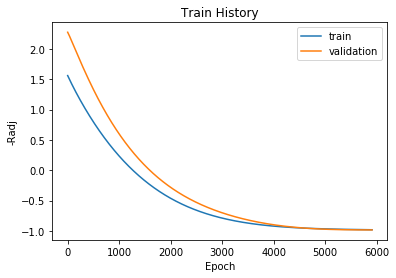

In [117]:
show_train_history('loss','val_loss','-Radj',hist)

In [118]:
scores = model.evaluate(ts_x, ts_y)
print('Loss(Radj):',scores[0]) # Loss value
print('MSE:',scores[1]) # Metric value

200/200 [==============================] - 0s 65us/step
Loss(Radj): -0.9123757815361023
MSE: 4.1126790046691895


In [119]:
# Train Result
w = np.array(model.layers[0].get_weights()[0].round(3)).reshape(1,p)[0]
b = np.array(model.layers[0].get_weights()[1].round(3))
print('intercept:',b,'\ncoefs:',w)

intercept: [-3.927] 
coefs: [-2.001  0.767 -3.391 -1.674  2.519  1.682  2.242  3.07  -2.615  3.081
 -3.458 -0.913  3.079  2.825  2.485 -0.376  1.428 -2.255  2.528  1.416]


In [120]:
# Ground Truth
print(intercept,coef )

[-4.94] [-2.28  0.66 -3.1  -1.61  2.22  2.05  1.81  3.01 -2.44  2.73 -3.13 -0.25
  3.47  3.06  2.82 -0.58  1.53 -2.56  1.85  1.71]


# PCA

### Load Data
[california_housing_dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [25]:
california_housing = fetch_california_housing()

In [26]:
california_housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [27]:
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [28]:
data = pd.DataFrame(data = california_housing.data, columns=california_housing.feature_names)

In [29]:
data['Target'] = california_housing.target

In [30]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
# pearson's correlation
corr = data.corr(method ='pearson') 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1,-0.12,0.33,-0.062,0.0048,0.019,-0.08,-0.015,0.69
HouseAge,-0.12,1,-0.15,-0.078,-0.3,0.013,0.011,-0.11,0.11
AveRooms,0.33,-0.15,1,0.85,-0.072,-0.0049,0.11,-0.028,0.15
AveBedrms,-0.062,-0.078,0.85,1,-0.066,-0.0062,0.07,0.013,-0.047
Population,0.0048,-0.3,-0.072,-0.066,1,0.07,-0.11,0.1,-0.025
AveOccup,0.019,0.013,-0.0049,-0.0062,0.07,1,0.0024,0.0025,-0.024
Latitude,-0.08,0.011,0.11,0.07,-0.11,0.0024,1,-0.92,-0.14
Longitude,-0.015,-0.11,-0.028,0.013,0.1,0.0025,-0.92,1,-0.046
Target,0.69,0.11,0.15,-0.047,-0.025,-0.024,-0.14,-0.046,1


(9.5, -0.5)

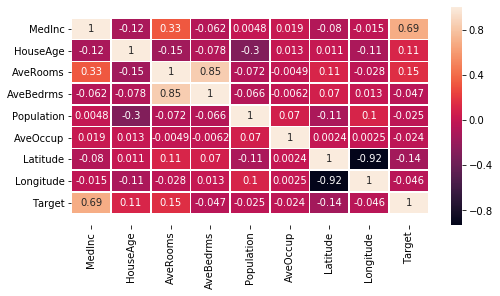

In [36]:
plt.figure(figsize = (8,4))
ax = sns.heatmap(corr,annot=True, linewidths=0.5)#.set_ylim(len(corr)-5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)

In [38]:
# shuffle
data = shuffle(data)
# split data
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Target'],axis=1), data['Target'], test_size=0.2, random_state=42)

In [39]:
def createN(data,nu):
    normalizer = {}
    for f in nu:
        normalizer[f]=[data[f].mean(),data[f].std()]
    return normalizer
def z_score(df,f,normalizer): #data,feature,normalizer
    df_zscore = (df - normalizer[f][0])/normalizer[f][1]
    return df_zscore

In [40]:
# normalization
normalizer = createN(X_train,X_train.columns)
normalizer

{'MedInc': [3.874232170542658, 1.8974520016563008],
 'HouseAge': [28.636809593023255, 12.584831632901341],
 'AveRooms': [5.430600239835954, 2.5536132501981914],
 'AveBedrms': [1.0974035264871387, 0.4991411320331704],
 'Population': [1419.249757751938, 1094.0743321075338],
 'AveOccup': [3.093463652353666, 11.58310959518065],
 'Latitude': [35.629688105620296, 2.1312411239339766],
 'Longitude': [-119.57057109980582, 2.001910067175114]}

In [41]:
for f in X_train.columns:
    X_train[f] = z_score(X_train[f],f,normalizer)
for f in X_test.columns:
    X_test[f] = z_score(X_test[f],f,normalizer)

In [42]:
print(data.Target.max(),data.Target.min())

5.00001 0.14999


In [43]:
# percentile list 
perc =[.20, .40, .60, .80] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
desc = y_train.describe(percentiles = perc)#include = include
desc

count    16512.000000
mean         2.075230
std          1.155168
min          0.149990
20%          1.081000
40%          1.578000
50%          1.804000
60%          2.100000
80%          2.915000
max          5.000010
Name: Target, dtype: float64

In [52]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14729,0.307817,0.187781,0.216016,-0.217403,-0.265293,-0.050468,-1.327718,1.274069
15230,3.803452,-0.686287,1.107922,-0.072382,-0.364920,-0.051235,-1.219800,1.179159
5554,0.163887,1.220770,-0.172059,-0.195142,-0.842950,-0.078877,-0.783435,0.584727
10132,-0.138940,-0.130062,-0.376462,-0.141772,0.124078,0.008030,-0.806895,0.829493
15921,0.066282,1.618074,-0.418583,-0.237769,-0.375888,-0.002558,0.985488,-1.428350
...,...,...,...,...,...,...,...,...
6474,0.118300,0.505624,-0.389964,-0.260472,-0.486484,0.010386,-0.722437,0.749570
5189,-1.164579,0.664545,0.013977,0.288835,-0.527615,0.141316,-0.792819,0.649665
2949,-0.874189,0.187781,-0.174618,0.240981,0.502480,0.022030,-0.131233,0.285013
8479,0.573015,0.426163,-0.030813,-0.292871,-0.562347,-0.025215,-0.797511,0.624689


In [45]:
group_index = [
    (y_train[y_train>=desc['min']].index)&(y_train[y_train<=desc['20%']].index),
    (y_train[y_train>desc['20%']].index)&(y_train[y_train<=desc['40%']].index),
    (y_train[y_train>desc['40%']].index)&(y_train[y_train<=desc['60%']].index),
    (y_train[y_train>desc['60%']].index)&(y_train[y_train<=desc['80%']].index),
    (y_train[y_train>desc['80%']].index)&(y_train[y_train<=desc['max']].index)
]

In [46]:
groups = []
for i in range(0,len(group_index)):
    groups.append([X_train.loc[group_index[i]],y_train.loc[group_index[i]]])

In [47]:
newData = pd.DataFrame()
for i in range(0,len(group_index)):
    df = pd.DataFrame(data = groups[i][0].mean().values.reshape(1,8),columns =groups[i][0].mean().index )
    df['Target'] = groups[i][1].mean()
    newData = newData.append(df)

In [48]:
newData = newData.reset_index(drop=True)

In [49]:
newData # group mean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,-0.801665,-0.003502,-0.101688,0.097112,-0.167965,0.014446,0.454201,-0.096160,0.798038
1,-0.403589,-0.145251,-0.089397,0.027754,0.113309,0.037814,0.007670,0.105536,1.336126
2,-0.122655,-0.050096,-0.077602,-0.001945,0.093282,0.000386,-0.234315,0.179982,1.808601
3,0.258123,-0.016695,0.003107,-0.071060,0.087843,-0.020519,-0.128832,-0.046675,2.461989
4,1.070392,0.215503,0.265646,-0.051941,-0.126283,-0.032128,-0.099134,-0.142564,3.972332


In [50]:
corr = newData.corr(method ='pearson') 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1,0.78,0.94,-0.85,-0.091,-0.84,-0.62,-0.39,1
HouseAge,0.78,1,0.91,-0.4,-0.68,-0.82,-0.072,-0.74,0.81
AveRooms,0.94,0.91,1,-0.64,-0.4,-0.79,-0.34,-0.61,0.96
AveBedrms,-0.85,-0.4,-0.64,1,-0.36,0.75,0.82,0.11,-0.82
Population,-0.091,-0.68,-0.4,-0.36,1,0.28,-0.66,0.79,-0.15
AveOccup,-0.84,-0.82,-0.79,0.75,0.28,1,0.42,0.54,-0.85
Latitude,-0.62,-0.072,-0.34,0.82,-0.66,0.42,1,-0.44,-0.58
Longitude,-0.39,-0.74,-0.61,0.11,0.79,0.54,-0.44,1,-0.43
Target,1,0.81,0.96,-0.82,-0.15,-0.85,-0.58,-0.43,1


(9.5, -0.5)

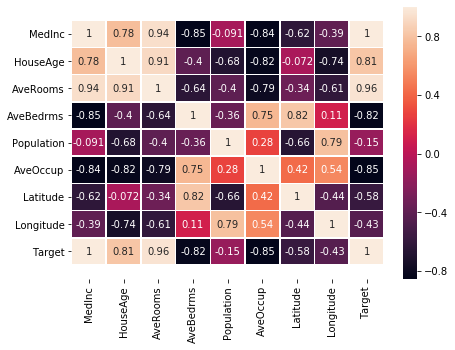

In [51]:
plt.figure(figsize = (7,5))
ax = sns.heatmap(corr,annot=True, linewidths=0.5)#.set_ylim(len(corr)-5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)

In [53]:
pca = PCA(n_components=0.99)
pca.fit(newData.drop(['Target'],axis=1))
print ('explained_variance_ratio:',pca.explained_variance_ratio_)
print ('explained_variance:',pca.explained_variance_)

explained_variance_ratio: [0.86620487 0.12426181]
explained_variance: [0.57508694 0.08249935]


In [57]:
model = Sequential()
model.add(Dense(units=1))
model.compile(loss ='mean_squared_error',optimizer='adam',metrics=['mse']) 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2)
hist = model.fit(x=pca.transform(X_train), y=y_train.values,validation_split=0.2,epochs=1000, batch_size=100,verbose=2,shuffle=True, callbacks=[early_stopping])

Train on 13209 samples, validate on 3303 samples
Epoch 1/1000
 - 1s - loss: 5.0966 - mse: 5.0966 - val_loss: 4.6072 - val_mse: 4.6072
Epoch 2/1000
 - 0s - loss: 4.4308 - mse: 4.4308 - val_loss: 4.0117 - val_mse: 4.0117
Epoch 3/1000
 - 0s - loss: 3.8784 - mse: 3.8784 - val_loss: 3.5185 - val_mse: 3.5185
Epoch 4/1000
 - 0s - loss: 3.4151 - mse: 3.4151 - val_loss: 3.1016 - val_mse: 3.1016
Epoch 5/1000
 - 0s - loss: 3.0177 - mse: 3.0177 - val_loss: 2.7407 - val_mse: 2.7407
Epoch 6/1000
 - 0s - loss: 2.6754 - mse: 2.6754 - val_loss: 2.4282 - val_mse: 2.4282
Epoch 7/1000
 - 0s - loss: 2.3767 - mse: 2.3767 - val_loss: 2.1533 - val_mse: 2.1533
Epoch 8/1000
 - 0s - loss: 2.1141 - mse: 2.1141 - val_loss: 1.9125 - val_mse: 1.9125
Epoch 9/1000
 - 0s - loss: 1.8839 - mse: 1.8839 - val_loss: 1.7010 - val_mse: 1.7010
Epoch 10/1000
 - 0s - loss: 1.6825 - mse: 1.6825 - val_loss: 1.5170 - val_mse: 1.5170
Epoch 11/1000
 - 0s - loss: 1.5072 - mse: 1.5072 - val_loss: 1.3581 - val_mse: 1.3581
Epoch 12/1000


In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


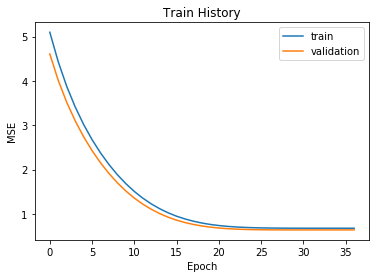

In [59]:
show_train_history('loss','val_loss','MSE',hist)

In [60]:
scores = model.evaluate(pca.transform(X_test), y_test.values)
print('Loss(MSE):',scores[0]) # Loss value
print('MSE:',scores[1]) # Metric value

4128/4128 [==============================] - 0s 43us/step
Loss(MSE): 0.6352107163316519
MSE: 0.6352106332778931


In [61]:
result = pd.DataFrame()
result['Actual']=y_test
result['Predict'] = model.predict(pca.transform(X_test))
result

,Actual,Predict
8905,3.47900,1.925985
3946,2.32900,2.330708
19680,0.73500,1.063354
17089,1.66700,1.448828
16170,5.00001,1.934036
...,...,...
9168,4.50000,1.128261
13656,0.95800,1.022830
13375,2.06300,2.508367
4568,0.87500,1.113083


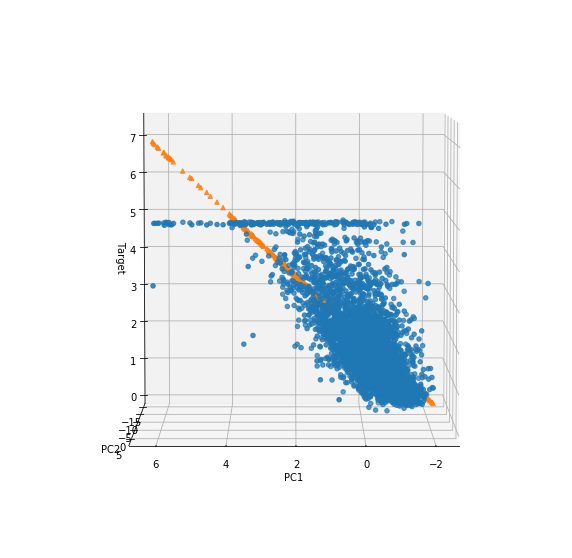

In [89]:
from mpl_toolkits.mplot3d import Axes3D  

act = (pca.transform(X_test), result['Actual'])
pred = (pca.transform(X_test), result['Predict'])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(act[0][:,0], act[0][:,1], act[1], marker='o')
ax.scatter(pred[0][:,0], pred[0][:,1], pred[1],s=20,marker='^')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Target')

elev = 5
azim = 90
ax.view_init(elev, azim)
plt.show()